In [2]:
import pandas as pd 
import numpy as np
import os
import sklearn
import joblib
import xgboost as xgb
import matplotlib.pyplot as plt
import warnings
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, BaggingRegressor
from sklearn.multioutput import MultiOutputRegressor
from lazy_test import *
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from engagement_utils import *

warnings.filterwarnings('ignore')
post_data = pd.read_csv('/home/theerthala/Documents/repos/Crowdfunding-Social-Media-Drivers/Data/Original_dataset/processed_data.csv')
post_data.drop('original_index', axis=1, inplace=True)
# post_data.head()

#adding emotionality score
emotion_cols = ['fear','anger', 'anticip', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy']
post_data['emotionality'] = post_data[emotion_cols].sum(axis=1)

features = [x for x in post_data.columns if x not in target_cols]
features = post_data[features]
targets = post_data[target_cols]

processed_features = pre_process(features)
processed_targets = process_targets(targets)
x_train, x_test, y_train, y_test = train_test_split(processed_features, processed_targets, test_size=0.2, random_state=42)

y_test = decode_targets(y_test)

In [ ]:
reg_test = RegressionModels(x_train, x_test, y_train.iloc[:,0], y_test.iloc[:,0])
reg_test.run_evaluation()
reg_test.all_scores['diff_R2'] = reg_test.all_scores['Insample R2'] - reg_test.all_scores['Outsample R2']
reg_test.all_scores.sort_values(by=['Outsample R2', 'diff_R2'], ascending=[False, True]).head(10)

Training models:  62%|██████▎   | 25/40 [00:16<00:06,  2.14it/s]

In [9]:
reg_test = RegressionModels(x_train, x_test, y_train.iloc[:,1], y_test.iloc[:,1])
reg_test.run_evaluation()
reg_test.all_scores['diff_R2'] = reg_test.all_scores['Insample R2'] - reg_test.all_scores['Outsample R2']
reg_test.all_scores.sort_values(by=['Outsample R2', 'diff_R2'], ascending=[False, True]).head(10)

Evaluating models: 100%|██████████| 39/39 [00:09<00:00,  4.10it/s] 


,Insample RMSE,Insample MAE,Insample R2,Insample EV Score,Outsample RMSE,Outsample MAE,Outsample R2,Outsample EV Score,diff_R2
RandomForestRegressor,0.249,0.191,0.957,0.957,1.608600e+01,6.135000e+00,4.710000e-01,4.860000e-01,4.860000e-01
HistGradientBoostingRegressor,0.468,0.368,0.848,0.848,1.617300e+01,6.168000e+00,4.650000e-01,4.830000e-01,3.830000e-01
BaggingRegressor,0.289,0.209,0.942,0.942,1.621600e+01,6.284000e+00,4.630000e-01,4.730000e-01,4.790000e-01
XGBRegressor,0.235,0.178,0.962,0.962,1.630700e+01,6.359000e+00,4.570000e-01,4.710000e-01,5.050000e-01
ExtraTreesRegressor,0.000,0.000,1.000,1.000,1.639000e+01,6.290000e+00,4.510000e-01,4.680000e-01,5.490000e-01
GradientBoostingRegressor,0.636,0.499,0.720,0.720,1.685700e+01,6.477000e+00,4.190000e-01,4.440000e-01,3.010000e-01
KNeighborsRegressor,0.592,0.451,0.757,0.757,1.732300e+01,6.852000e+00,3.870000e-01,4.040000e-01,3.700000e-01
AdaBoostRegressor,0.726,0.571,0.634,0.634,1.915500e+01,7.217000e+00,2.500000e-01,2.890000e-01,3.840000e-01
DecisionTreeRegressor,0.000,0.000,1.000,1.000,2.062100e+01,8.545000e+00,1.310000e-01,1.310000e-01,8.690000e-01
ARDRegression,0.951,0.753,0.372,0.372,2.100500e+01,8.780000e+00,9.800000e-02,1.500000e-01,2.740000e-01


In [10]:
reg_test = RegressionModels(x_train, x_test, y_train.iloc[:,2], y_test.iloc[:,2])
reg_test.run_evaluation()
reg_test.all_scores['diff_R2'] = reg_test.all_scores['Insample R2'] - reg_test.all_scores['Outsample R2']
reg_test.all_scores.sort_values(by=['Outsample R2', 'diff_R2'], ascending=[False, True]).head(10)

Evaluating models: 100%|██████████| 39/39 [00:09<00:00,  4.32it/s] 


,Insample RMSE,Insample MAE,Insample R2,Insample EV Score,Outsample RMSE,Outsample MAE,Outsample R2,Outsample EV Score,diff_R2
RandomForestRegressor,0.264,0.203,0.954,0.954,2.361500e+01,9.209000e+00,6.040000e-01,6.120000e-01,3.500000e-01
GradientBoostingRegressor,0.673,0.525,0.703,0.703,2.376000e+01,9.174000e+00,5.990000e-01,6.110000e-01,1.040000e-01
HistGradientBoostingRegressor,0.502,0.393,0.835,0.835,2.399700e+01,9.228000e+00,5.910000e-01,6.000000e-01,2.440000e-01
BaggingRegressor,0.315,0.229,0.935,0.935,2.409400e+01,9.610000e+00,5.880000e-01,5.930000e-01,3.470000e-01
XGBRegressor,0.246,0.184,0.960,0.960,2.430300e+01,9.781000e+00,5.810000e-01,5.850000e-01,3.790000e-01
ExtraTreesRegressor,0.000,0.000,1.000,1.000,2.493900e+01,9.544000e+00,5.580000e-01,5.710000e-01,4.420000e-01
KNeighborsRegressor,0.634,0.489,0.736,0.736,2.569400e+01,1.031400e+01,5.310000e-01,5.410000e-01,2.050000e-01
AdaBoostRegressor,0.775,0.616,0.606,0.606,2.982300e+01,1.087500e+01,3.680000e-01,3.950000e-01,2.380000e-01
ARDRegression,0.934,0.728,0.428,0.428,3.494700e+01,1.307200e+01,1.330000e-01,1.720000e-01,2.950000e-01
LinearRegression,0.930,0.726,0.433,0.433,3.496800e+01,1.310300e+01,1.320000e-01,1.710000e-01,3.010000e-01


In [2]:
param_grid = {
    'estimator__learning_rate': [0.1, 0.01, 0.05],
    'estimator__max_iter': [100, 200, 300],
    'estimator__max_depth': [None, 3, 5],
    'estimator__random_state': [42]
}

hist_grid_search = GridSearchCV(
    MultiOutputRegressor(HistGradientBoostingRegressor()),
    param_grid, cv=10, 
    scoring='neg_mean_squared_error', 
    verbose=2, n_jobs=-1
)

hist_grid_search.fit(x_train, y_train)

hist_best_params = hist_grid_search.best_params_
hist_best_estimator = hist_grid_search.best_estimator_

pprint(hist_best_params)

hist_best_estimator.fit(x_train, y_train)
save_model(hist_best_estimator, 'HistGradientBoost')

hist_pred = hist_best_estimator.predict(x_test)
hist_pred = decode_targets(hist_pred).astype(int)

hist_scores = evaluate_model_performance(y_test, hist_pred)
hist_scores

Fitting 10 folds for each of 27 candidates, totalling 270 fits
{'estimator__learning_rate': 0.05,
 'estimator__max_depth': None,
 'estimator__max_iter': 200,
 'estimator__random_state': 42}


,RMSE,R2,MSLE,EV Score
likes,34.490836,0.659593,0.170721,0.670561
shares,16.156780,0.466582,0.524387,0.490551
comments,23.885440,0.594867,0.520445,0.606306
positive_reactions,18.127032,0.546272,0.464494,0.563182
negative_reactions,43.266543,0.201714,0.874561,0.223958


In [3]:
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_features': [1, 'sqrt', 'log2'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
    'random_state': [42]
}

rf_grid_search = GridSearchCV(
    RandomForestRegressor(criterion="poisson", random_state=42), 
    param_grid, cv=5, 
    scoring='neg_mean_squared_error', 
    verbose=1, n_jobs=-1
    )

rf_grid_search.fit(x_train, y_train)

rf_best_params = rf_grid_search.best_params_
rf_best_estimator = rf_grid_search.best_estimator_

rf_best_estimator.fit(x_train, y_train)
save_model(rf_best_estimator, 'RandomForest')
rf_pred = rf_best_estimator.predict(x_test)
rf_pred = decode_targets(rf_pred).astype(int)

evaluate_model_performance(y_test, rf_pred)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


,RMSE,R2,MSLE,EV Score
likes,44.711075,0.427966,0.296914,0.465847
shares,19.256871,0.242243,0.573173,0.292173
comments,28.731031,0.413816,0.566308,0.444574
positive_reactions,22.091430,0.326109,0.541010,0.365714
negative_reactions,47.296098,0.046095,0.907381,0.075350


In [3]:
model = joblib.load('/home/theerthala/Documents/repos/Crowdfunding-Social-Media-Drivers/Modelling/final_models/01_Enagement_prediction/HistGradientBoost.pkl')
model

MultiOutputRegressor(estimator=HistGradientBoostingRegressor(learning_rate=0.05,
                                                             max_iter=200,
                                                             random_state=42))

In [4]:
topic_cols = [x for x in post_data.columns if 'topic' in x]
text_complexity_cols = ['readability','readability_lix', 'entropy_scores', 'perplexity_scores']
text_emotionality_cols = ['fear','anger', 'anticip', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy']
post_data.columns

Index(['page_name', 'likes_at_posting', 'followers_at_posting', 'type',
       'likes', 'comments', 'shares', 'post_views', 'readability',
       'readability_lix', 'entropy_scores', 'perplexity_scores', 'fear',
       'anger', 'anticip', 'trust', 'surprise', 'positive', 'negative',
       'sadness', 'disgust', 'joy', 'entities_identified', 'post_sponsored',
       'post_age', 'page_age', 'positive_reactions', 'negative_reactions',
       'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5',
       'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11',
       'emotionality'],
      dtype='object')

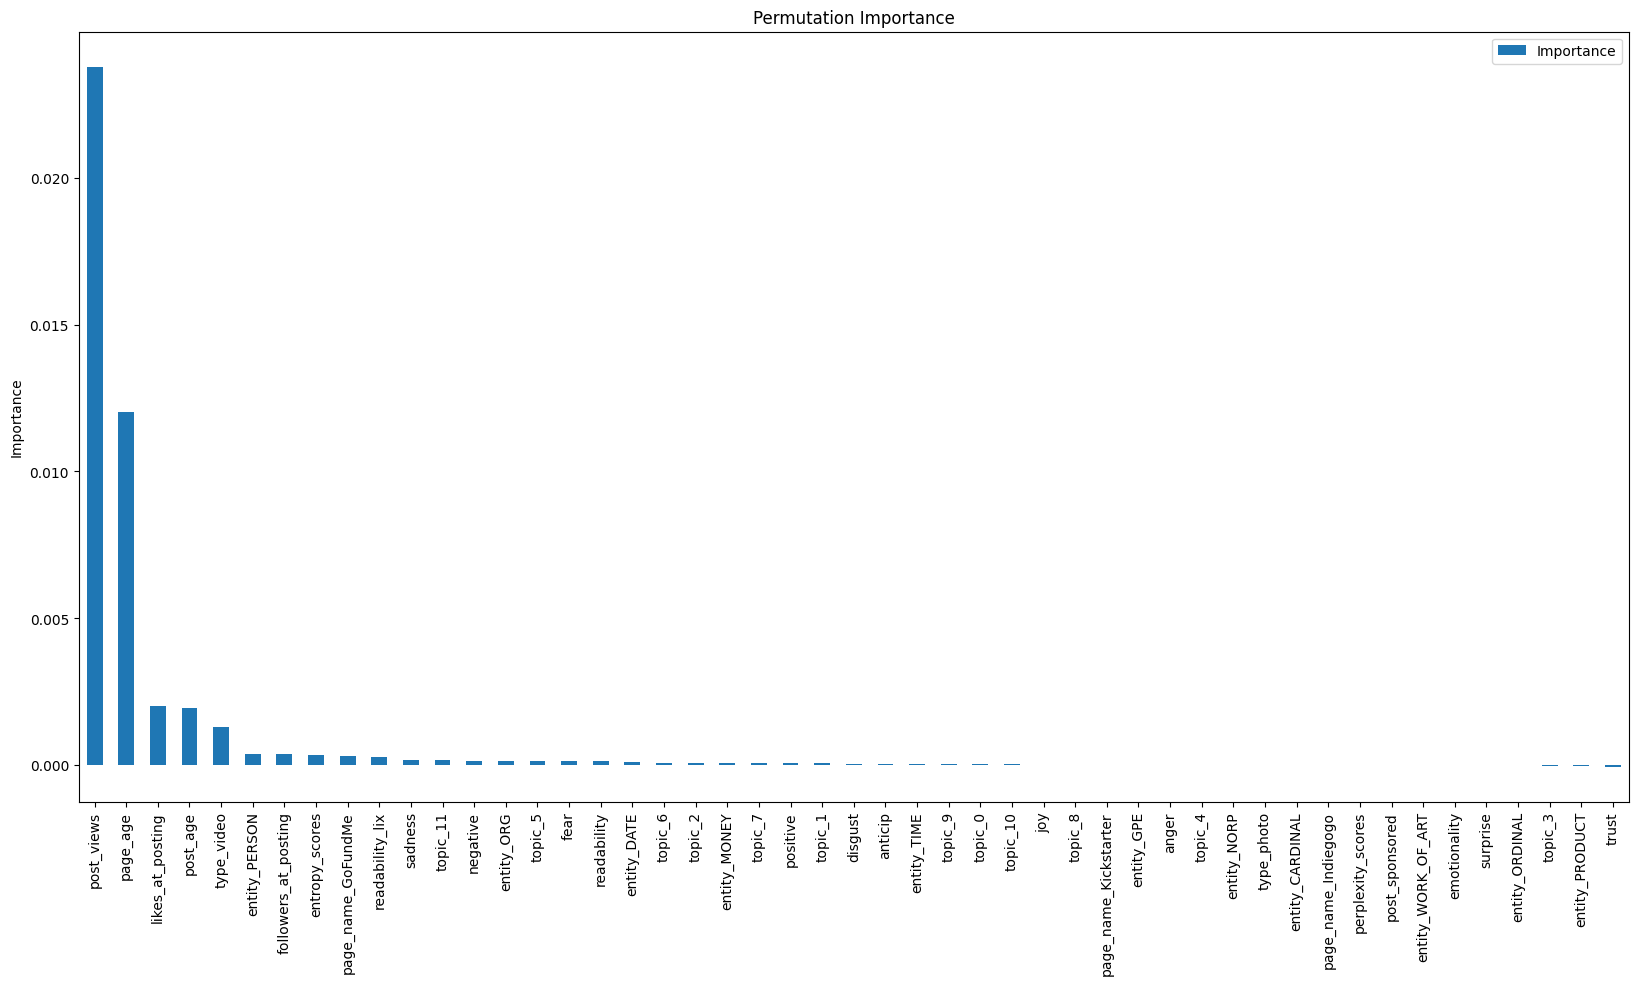

In [8]:
importance_df = plot_permutation_importance(model, x_test, y_test)

['fear',
 'anger',
 'anticip',
 'trust',
 'surprise',
 'positive',
 'negative',
 'sadness',
 'disgust',
 'joy',
 'emotionality']

In [ ]:
save_partial_dependence_plots(model, 
                            topic_cols,
                            x_test, 
                            feature_name = 'topics', 
                            categirical_features=None)

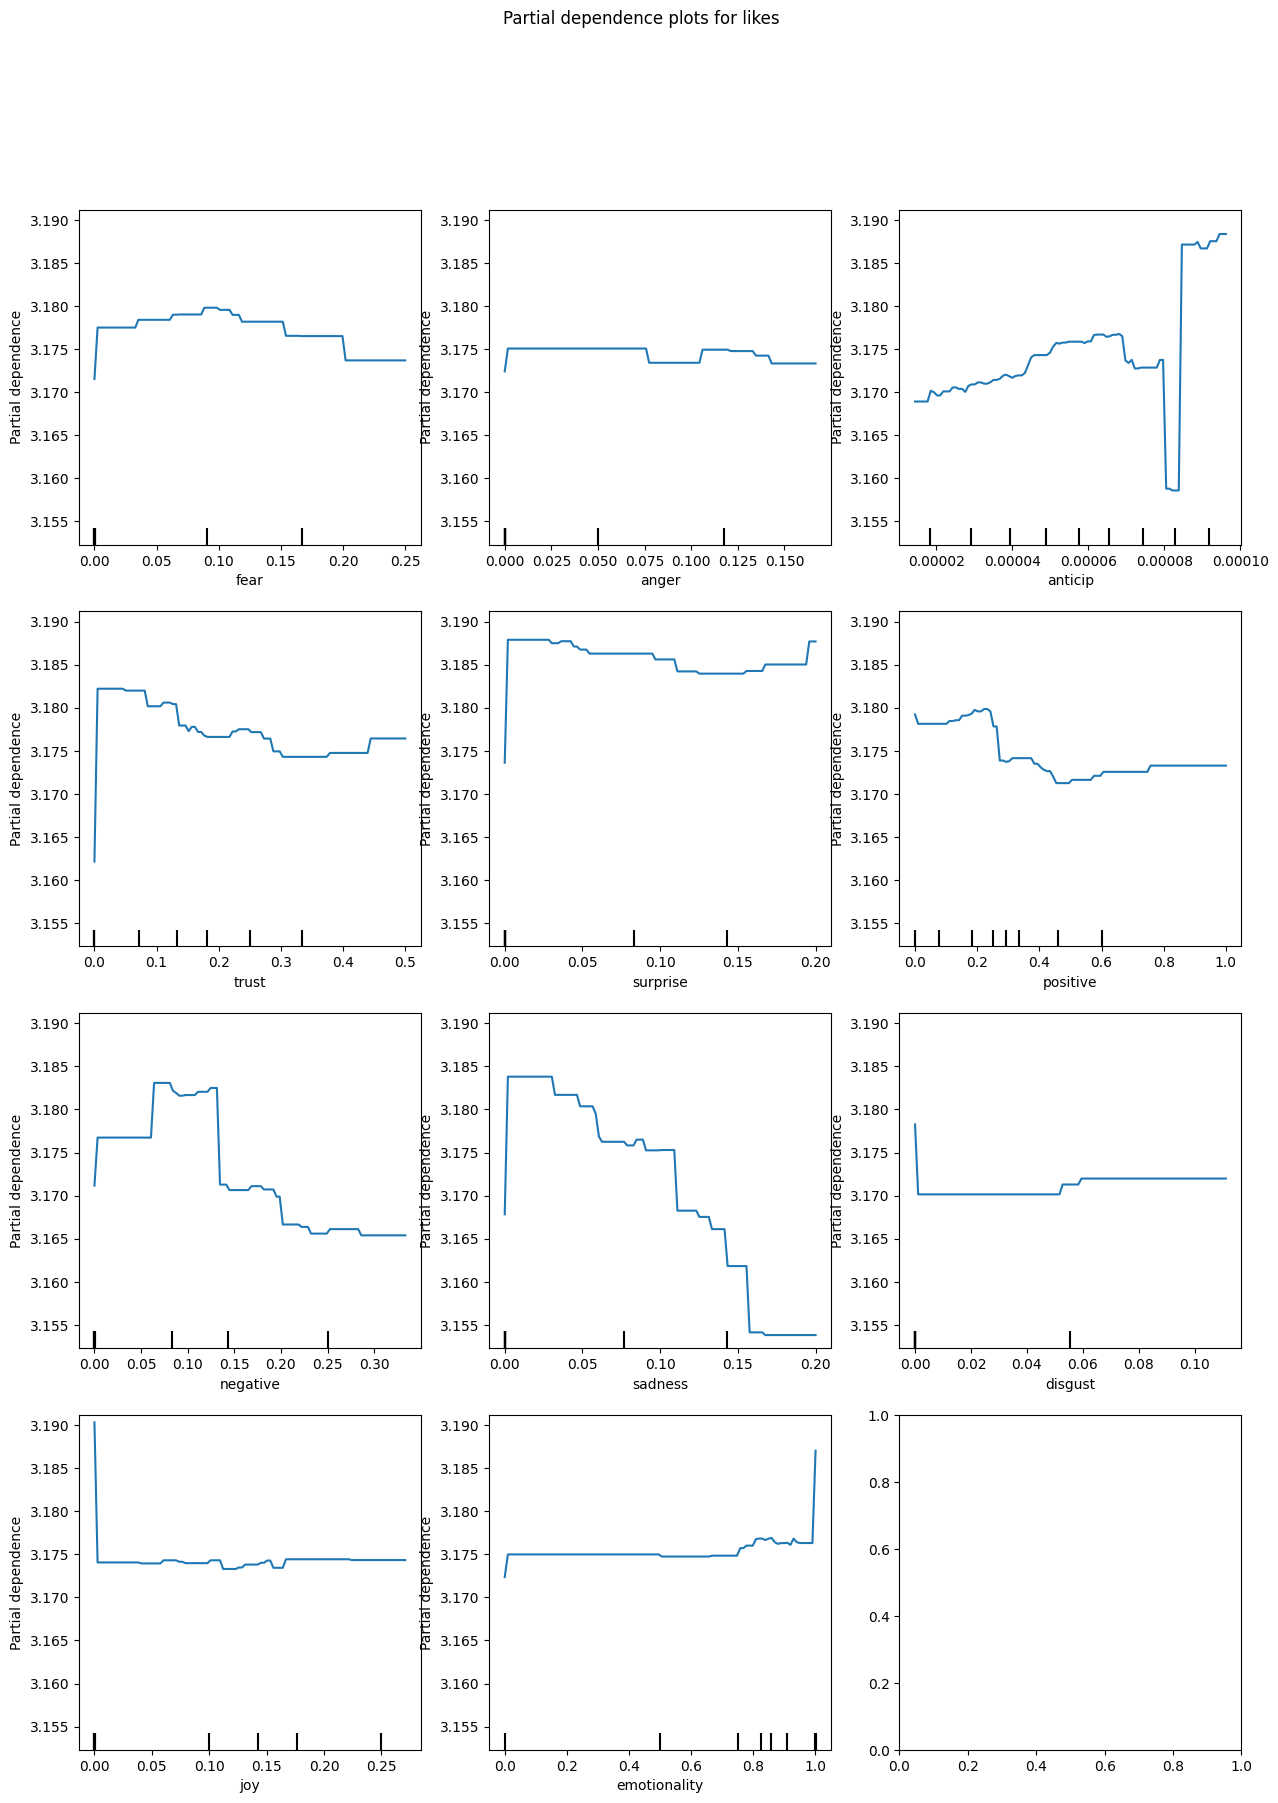

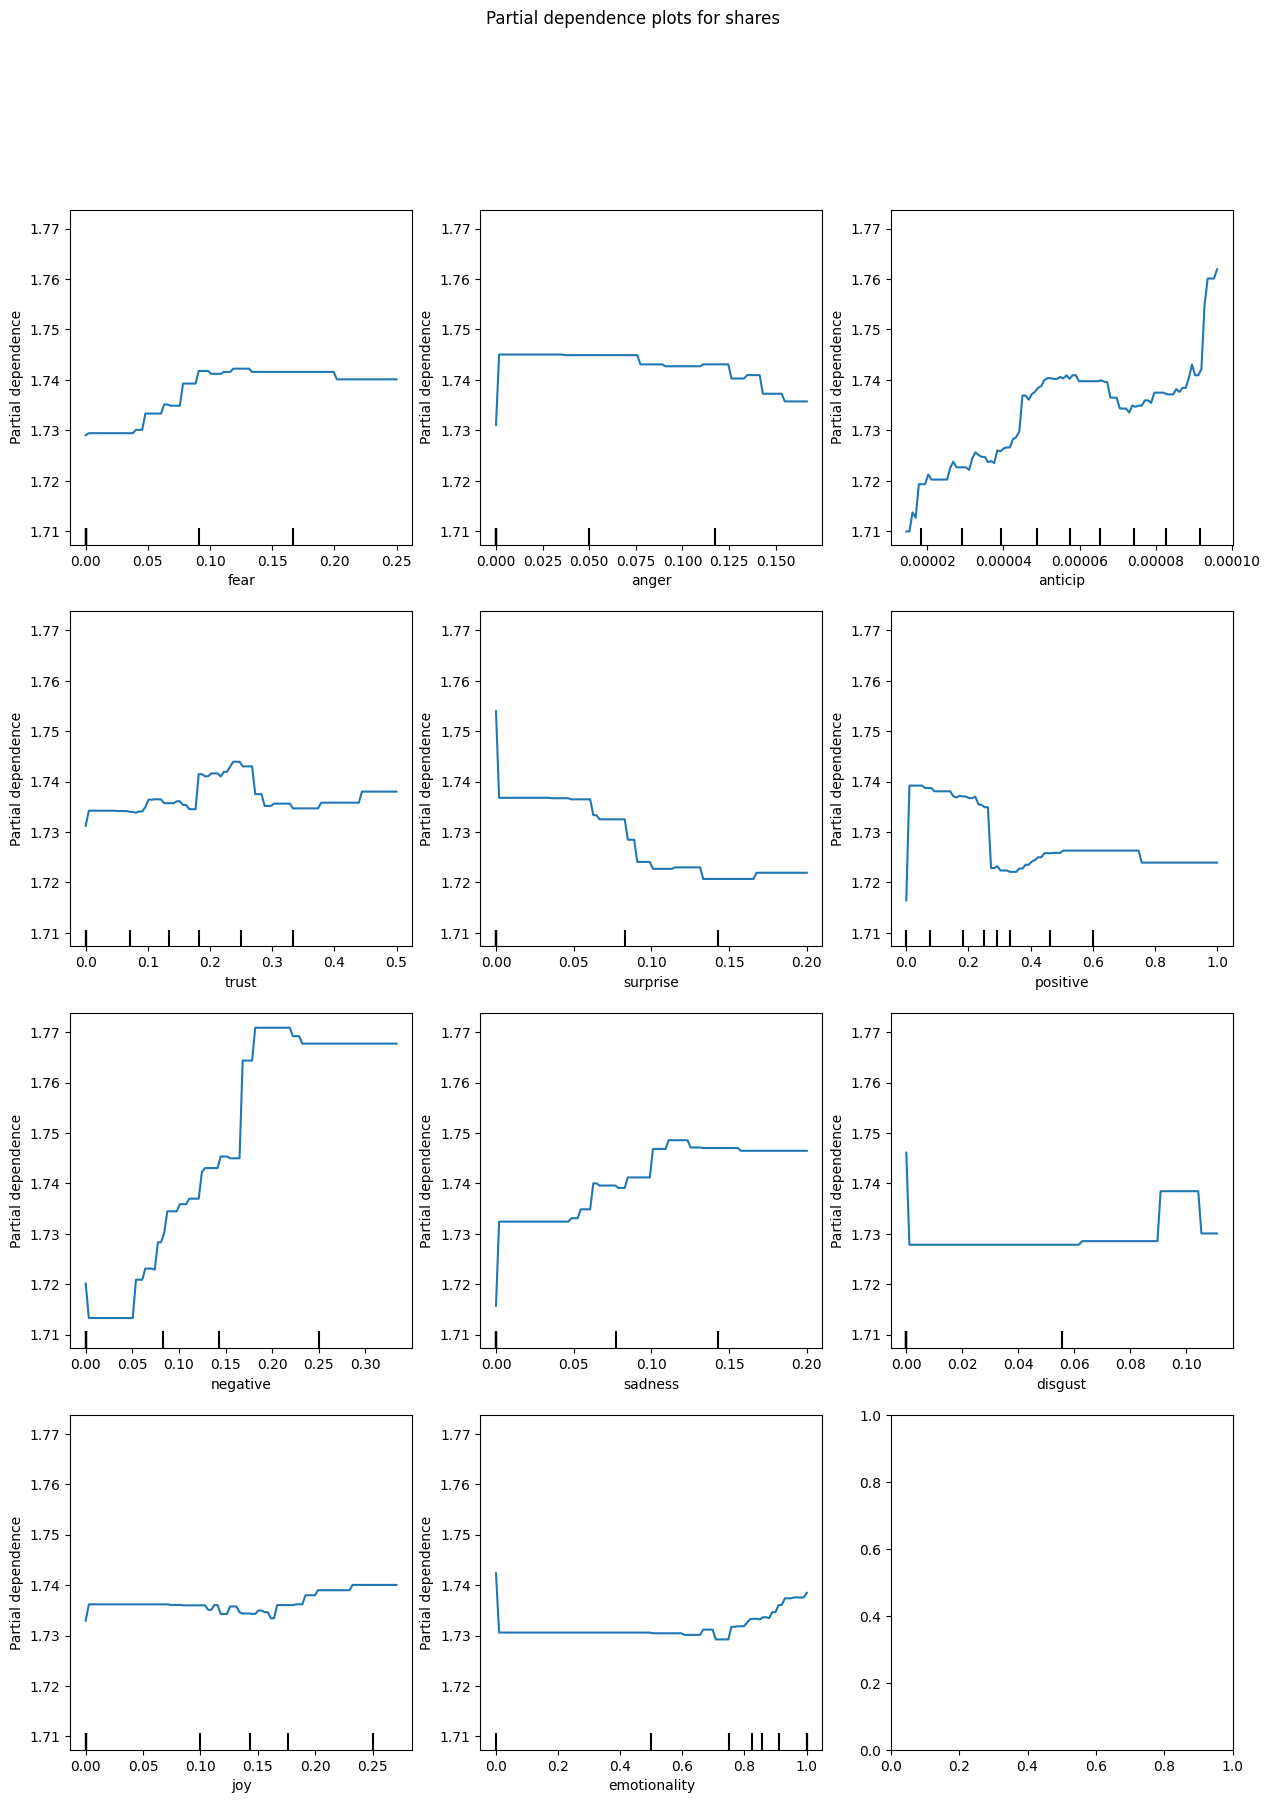

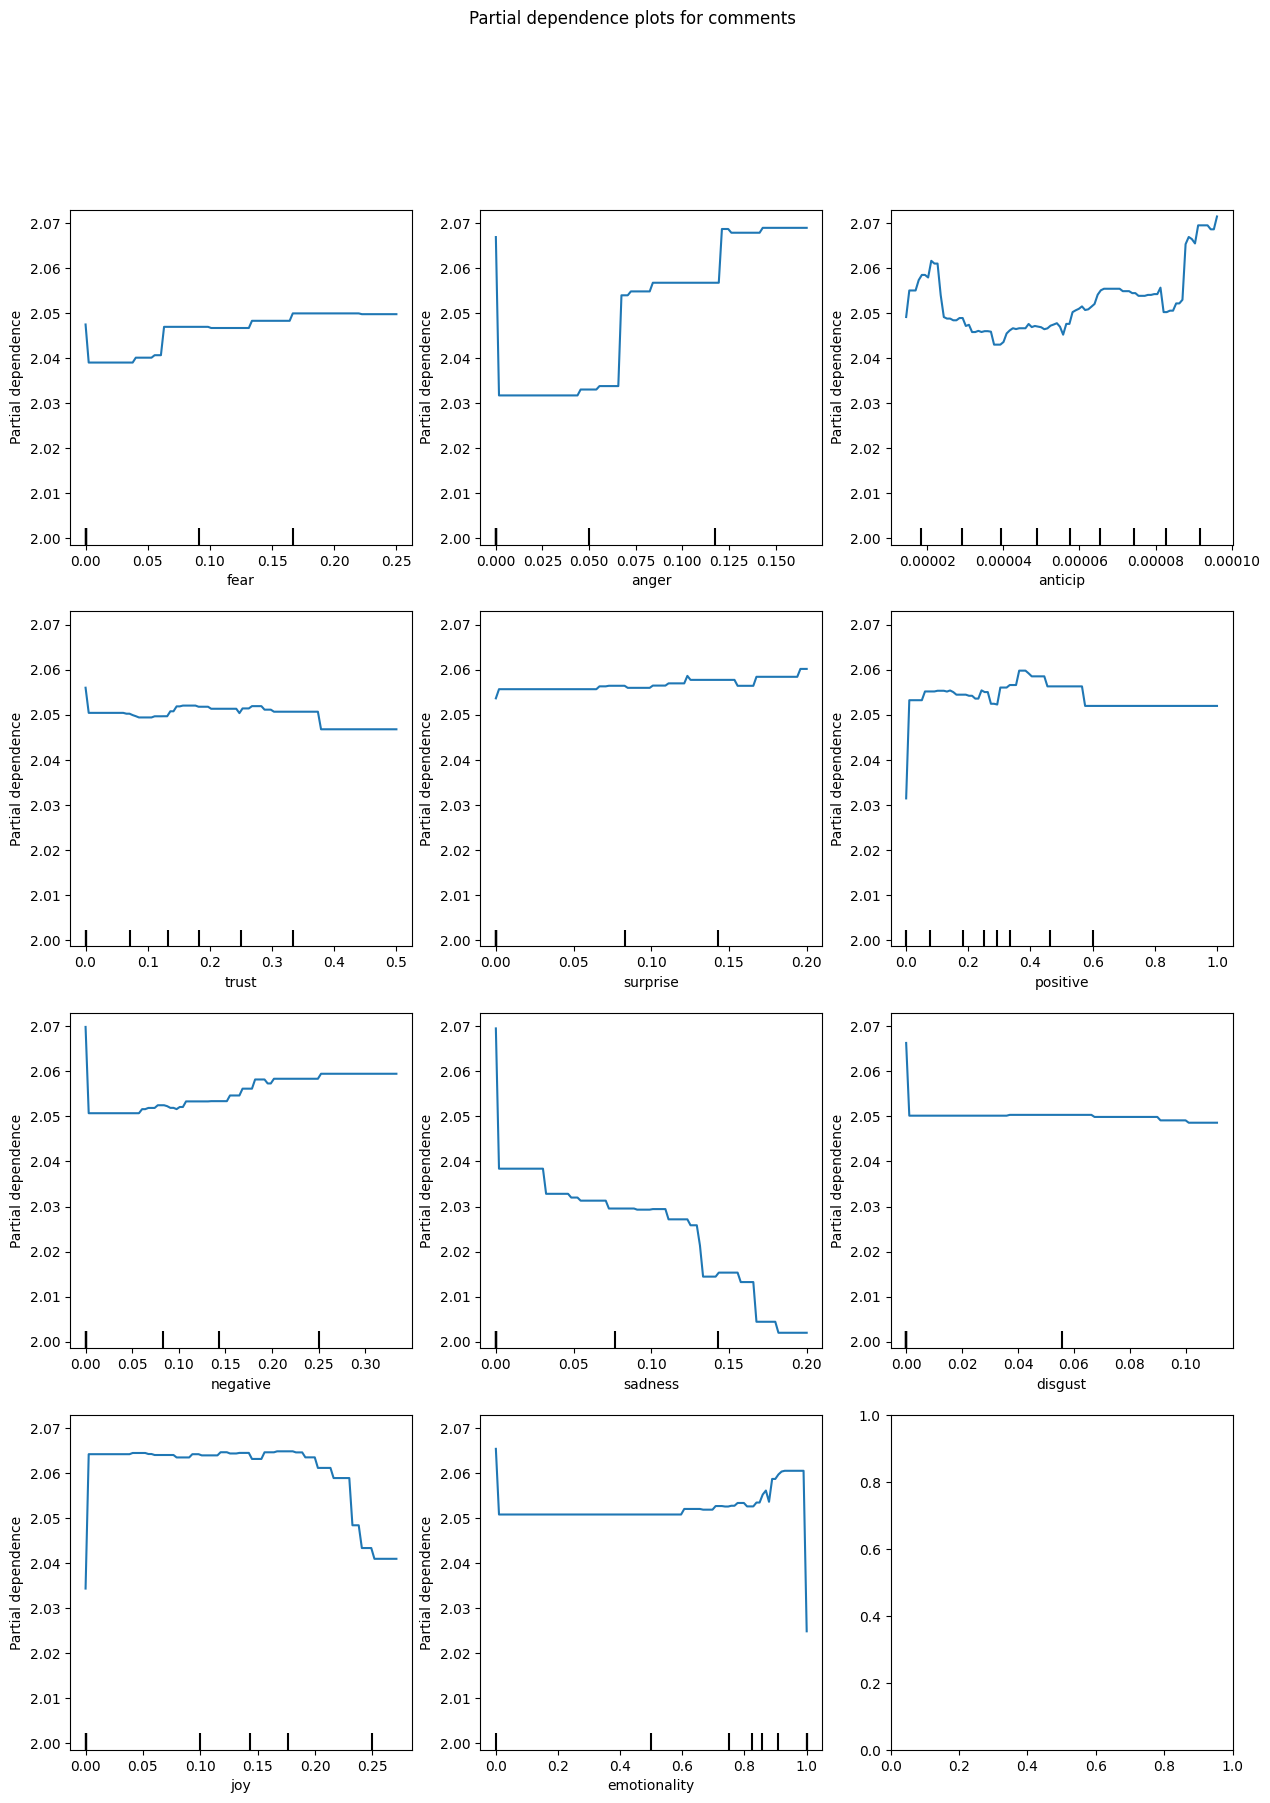

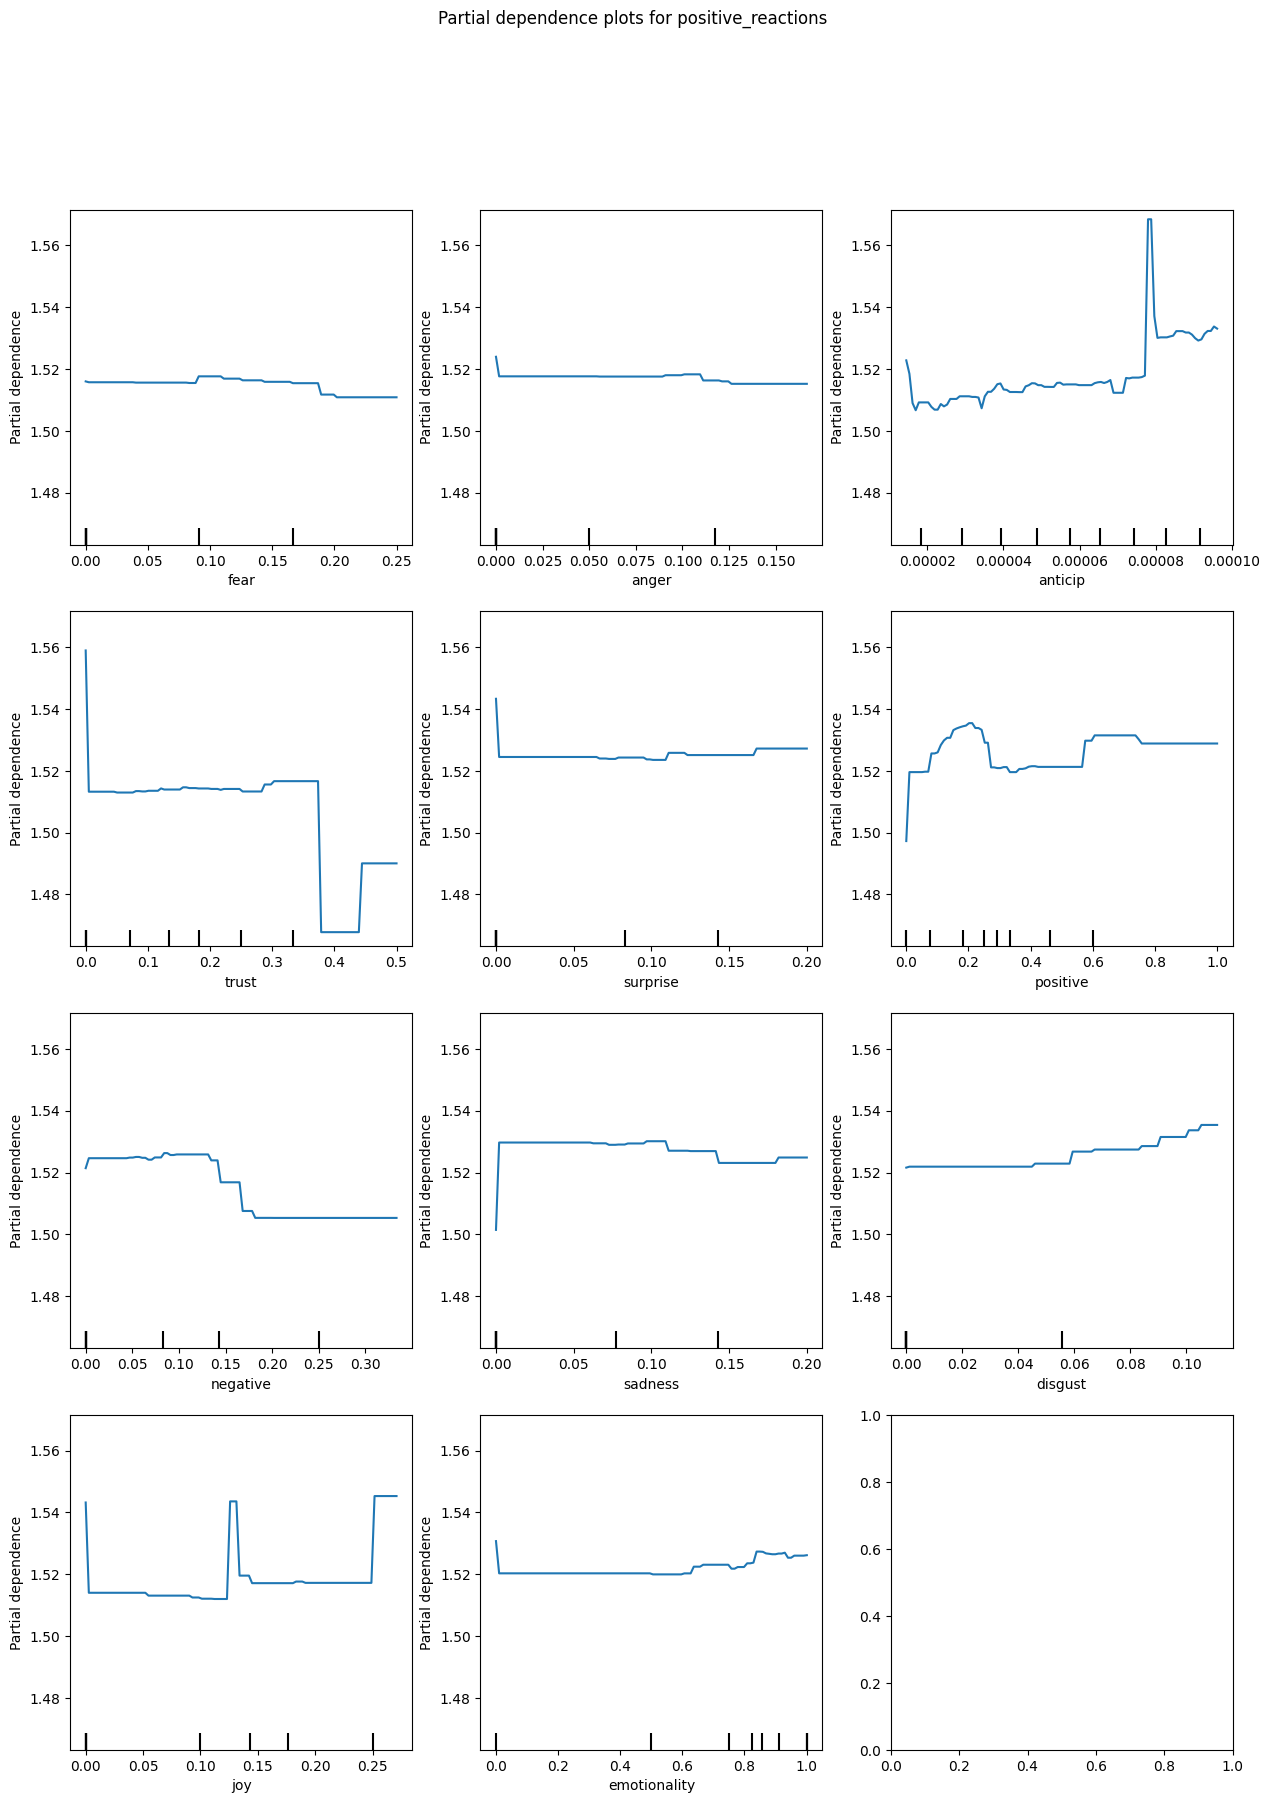

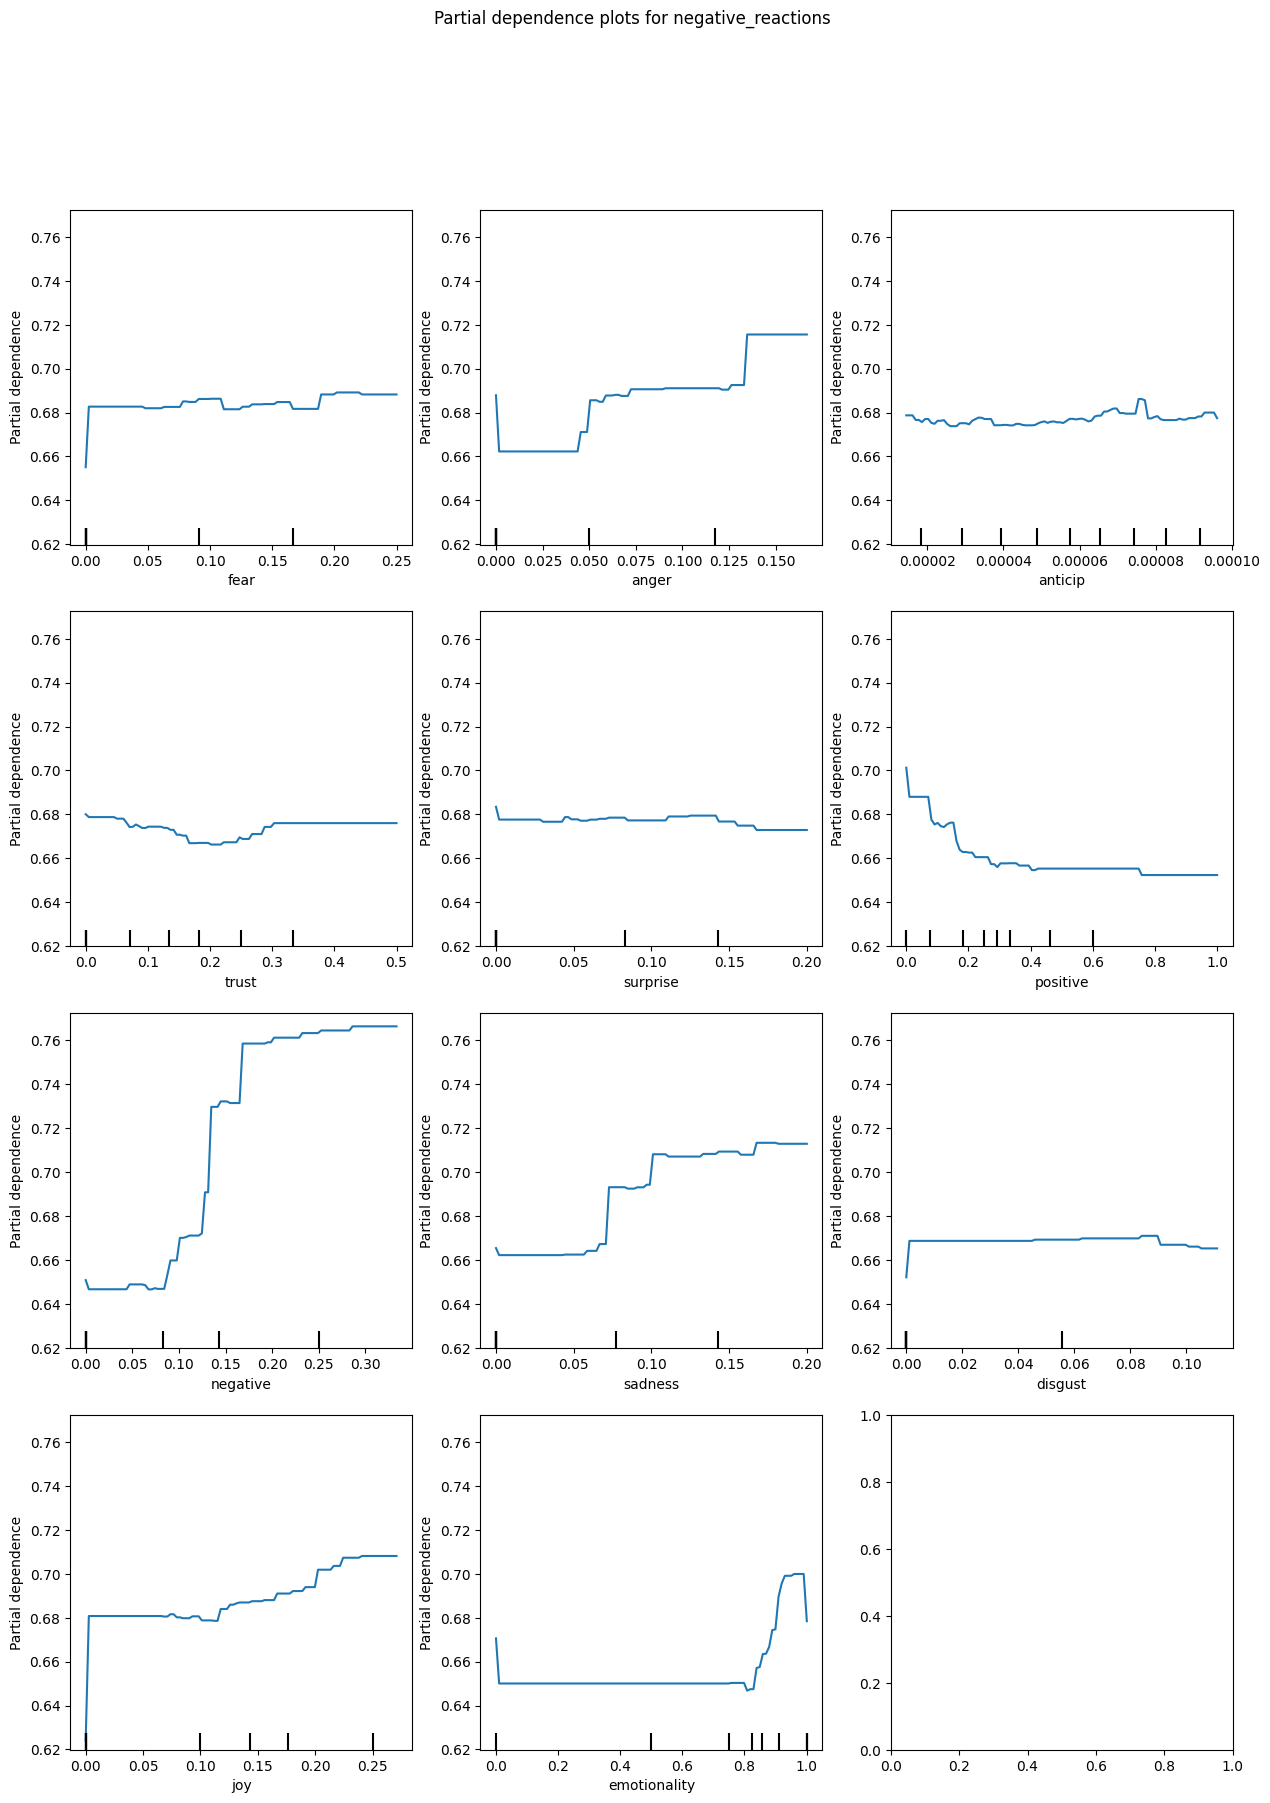

In [20]:
save_partial_dependence_plots(model, 
                            emotion_cols + ['emotionality'],
                            x_test, 
                            feature_name = 'emotionality', 
                            categirical_features=None)

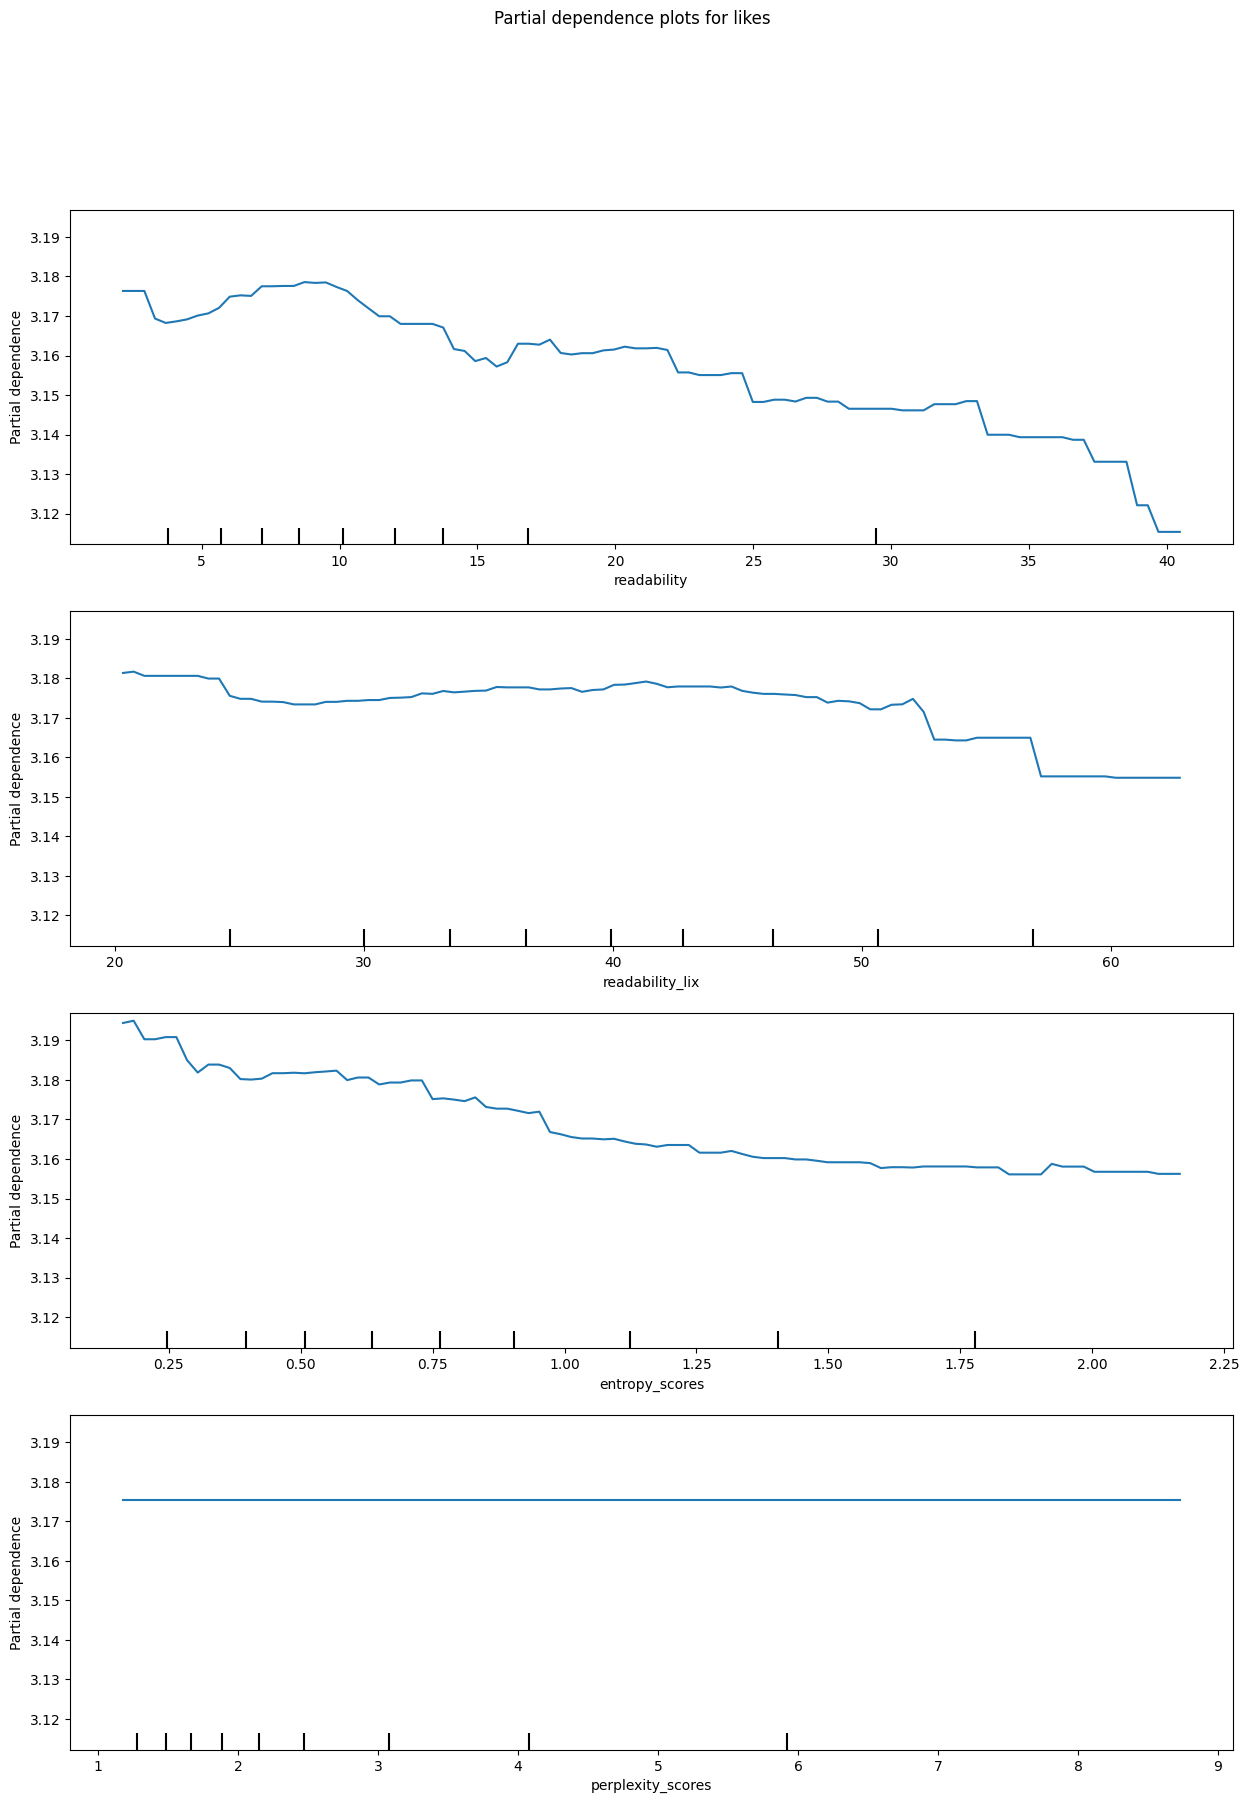

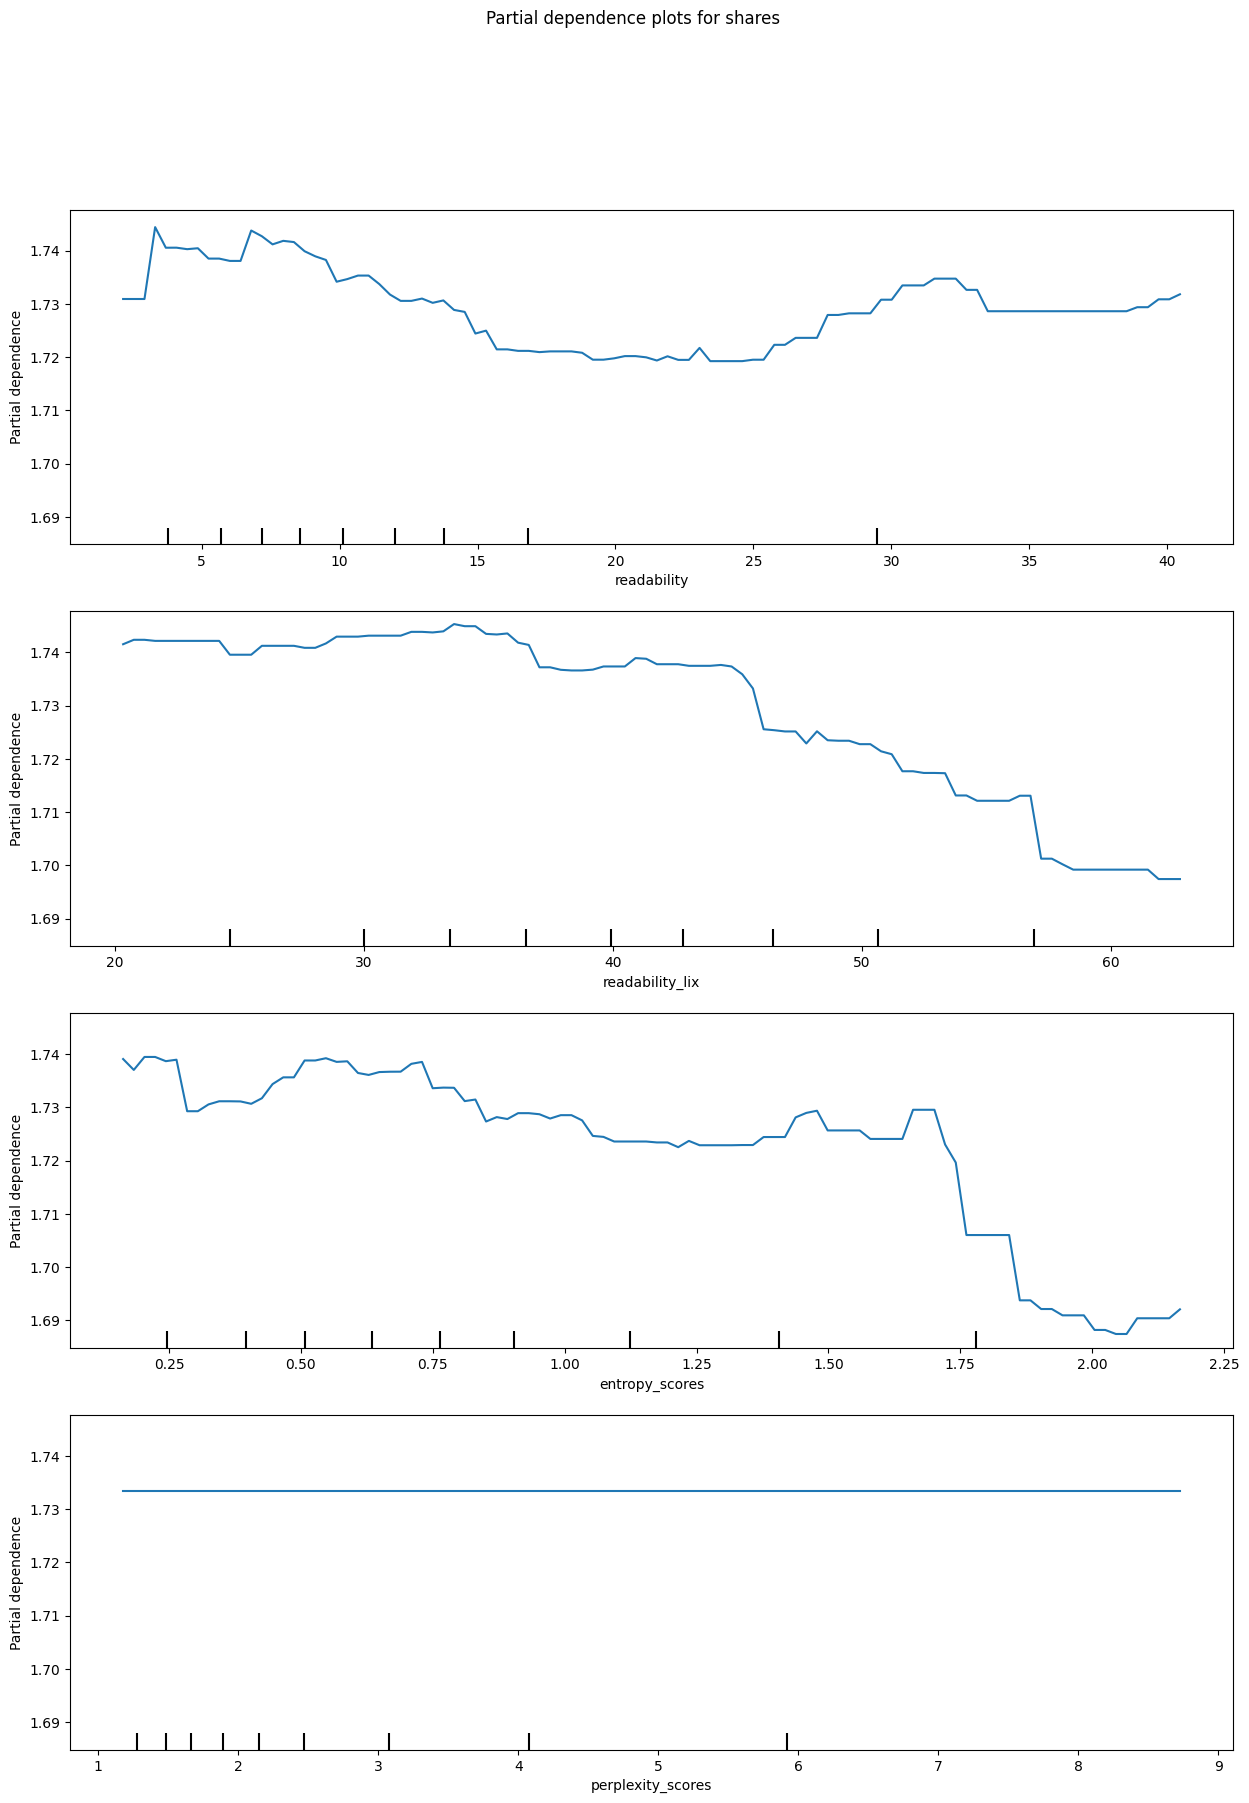

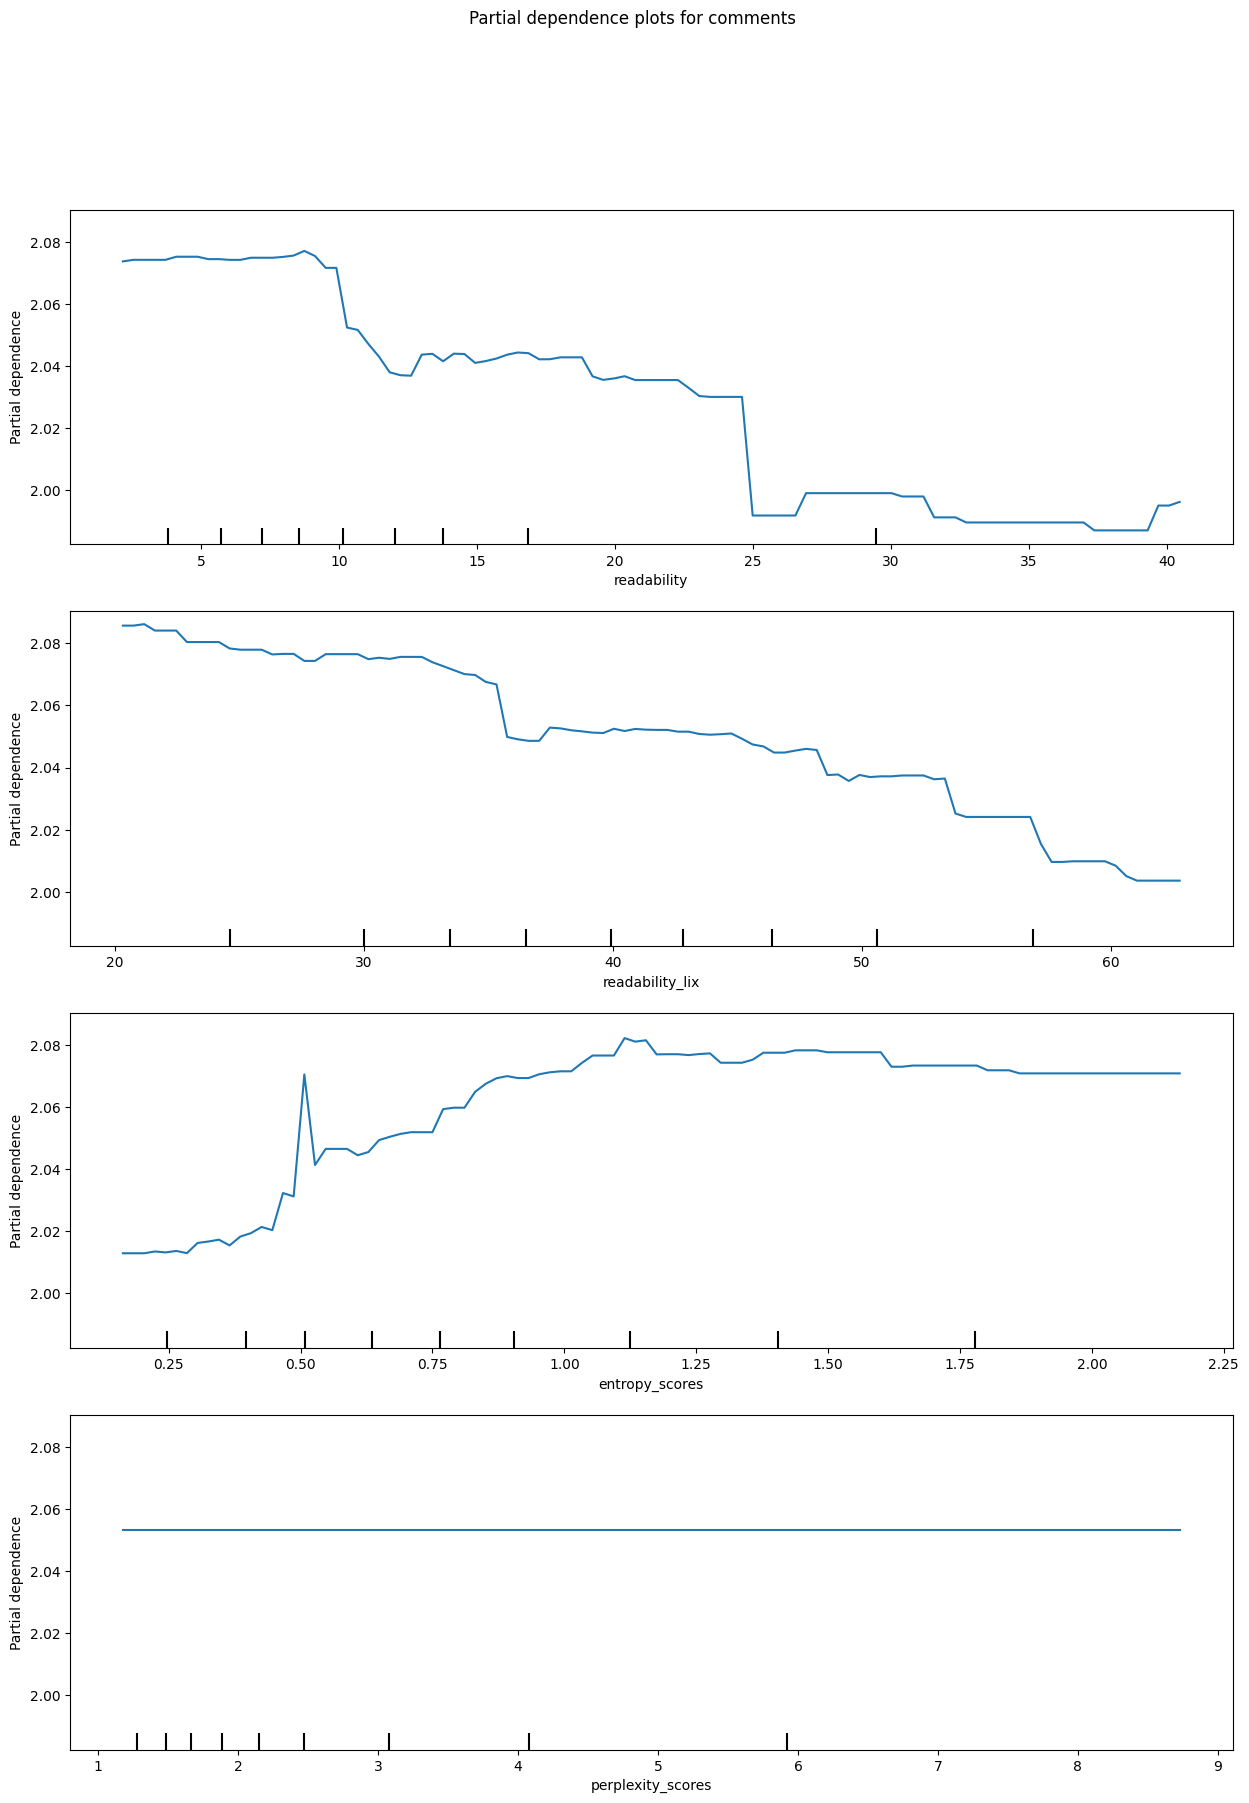

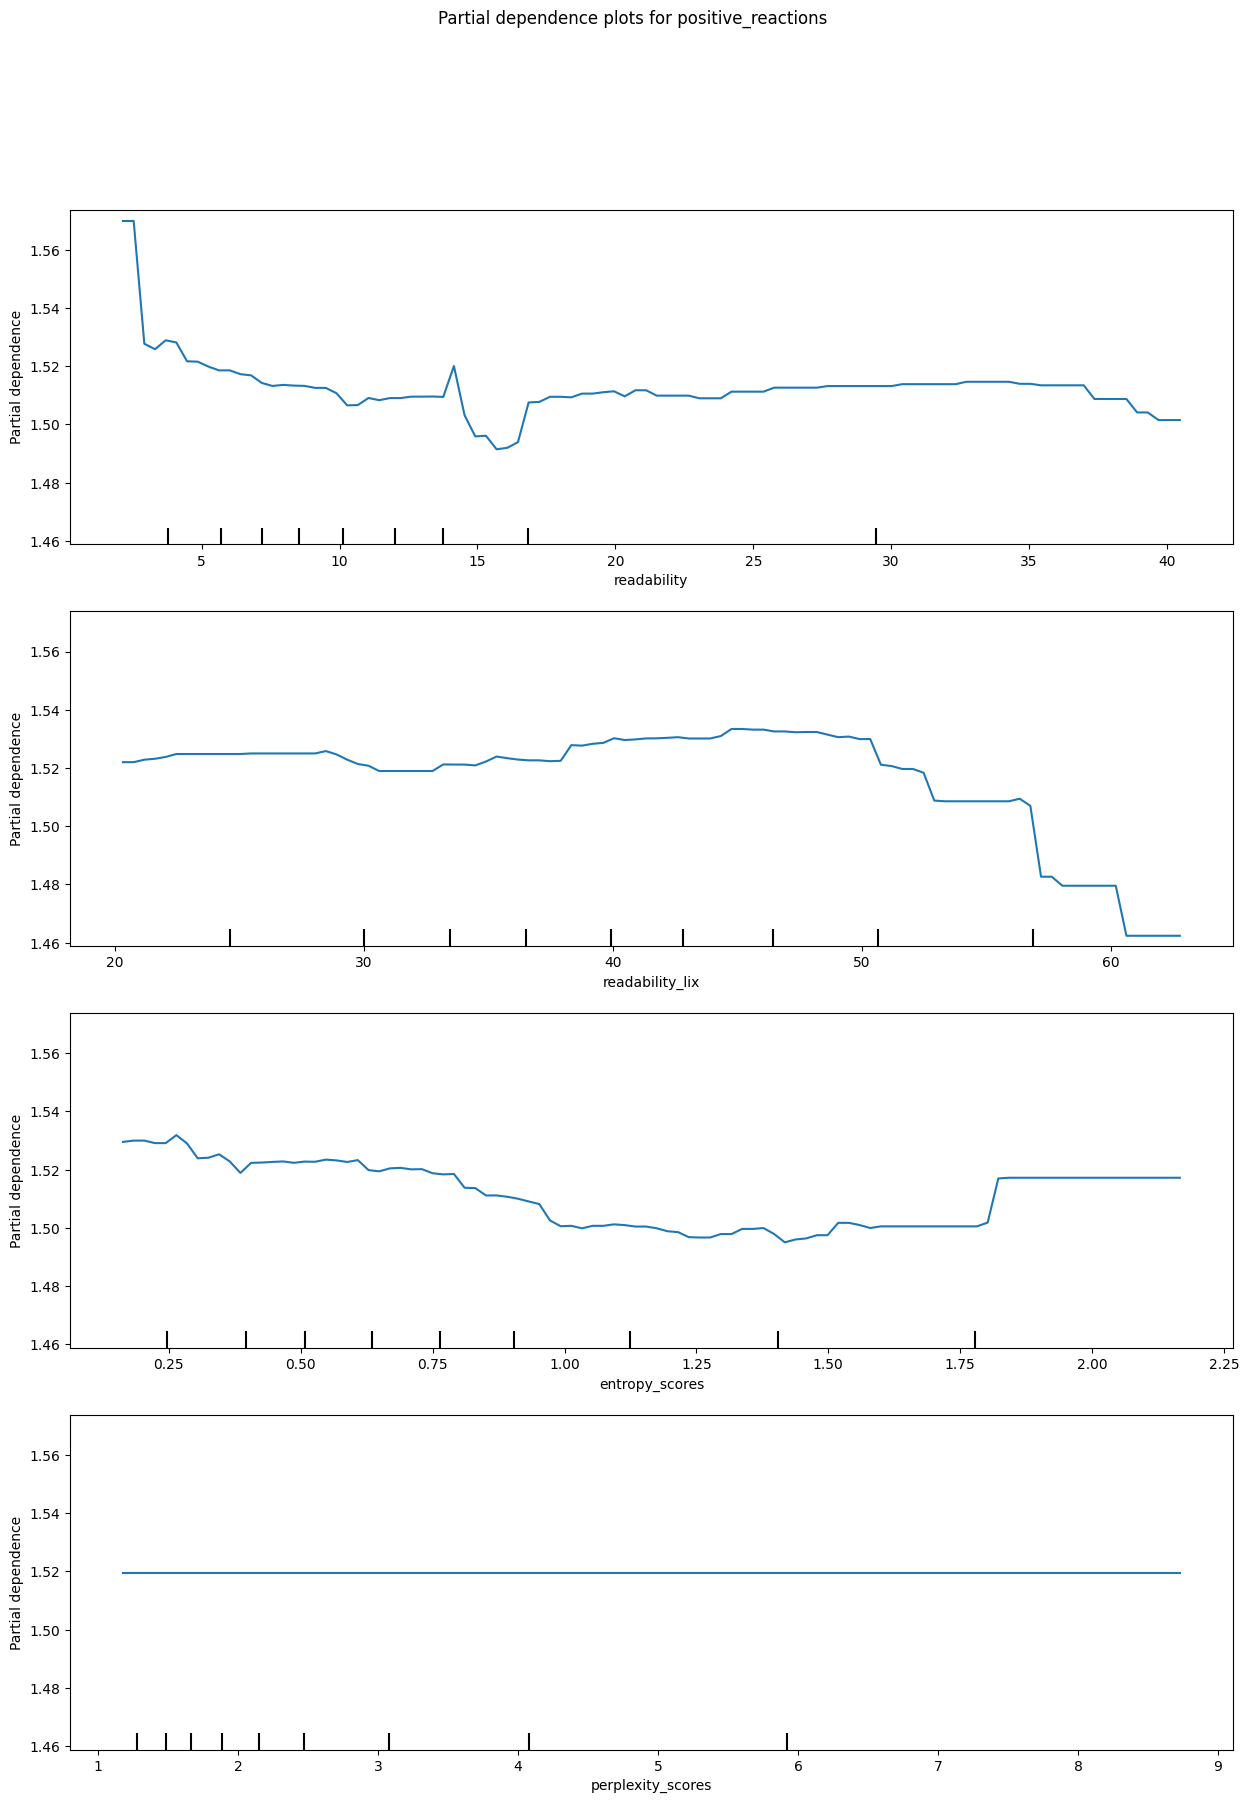

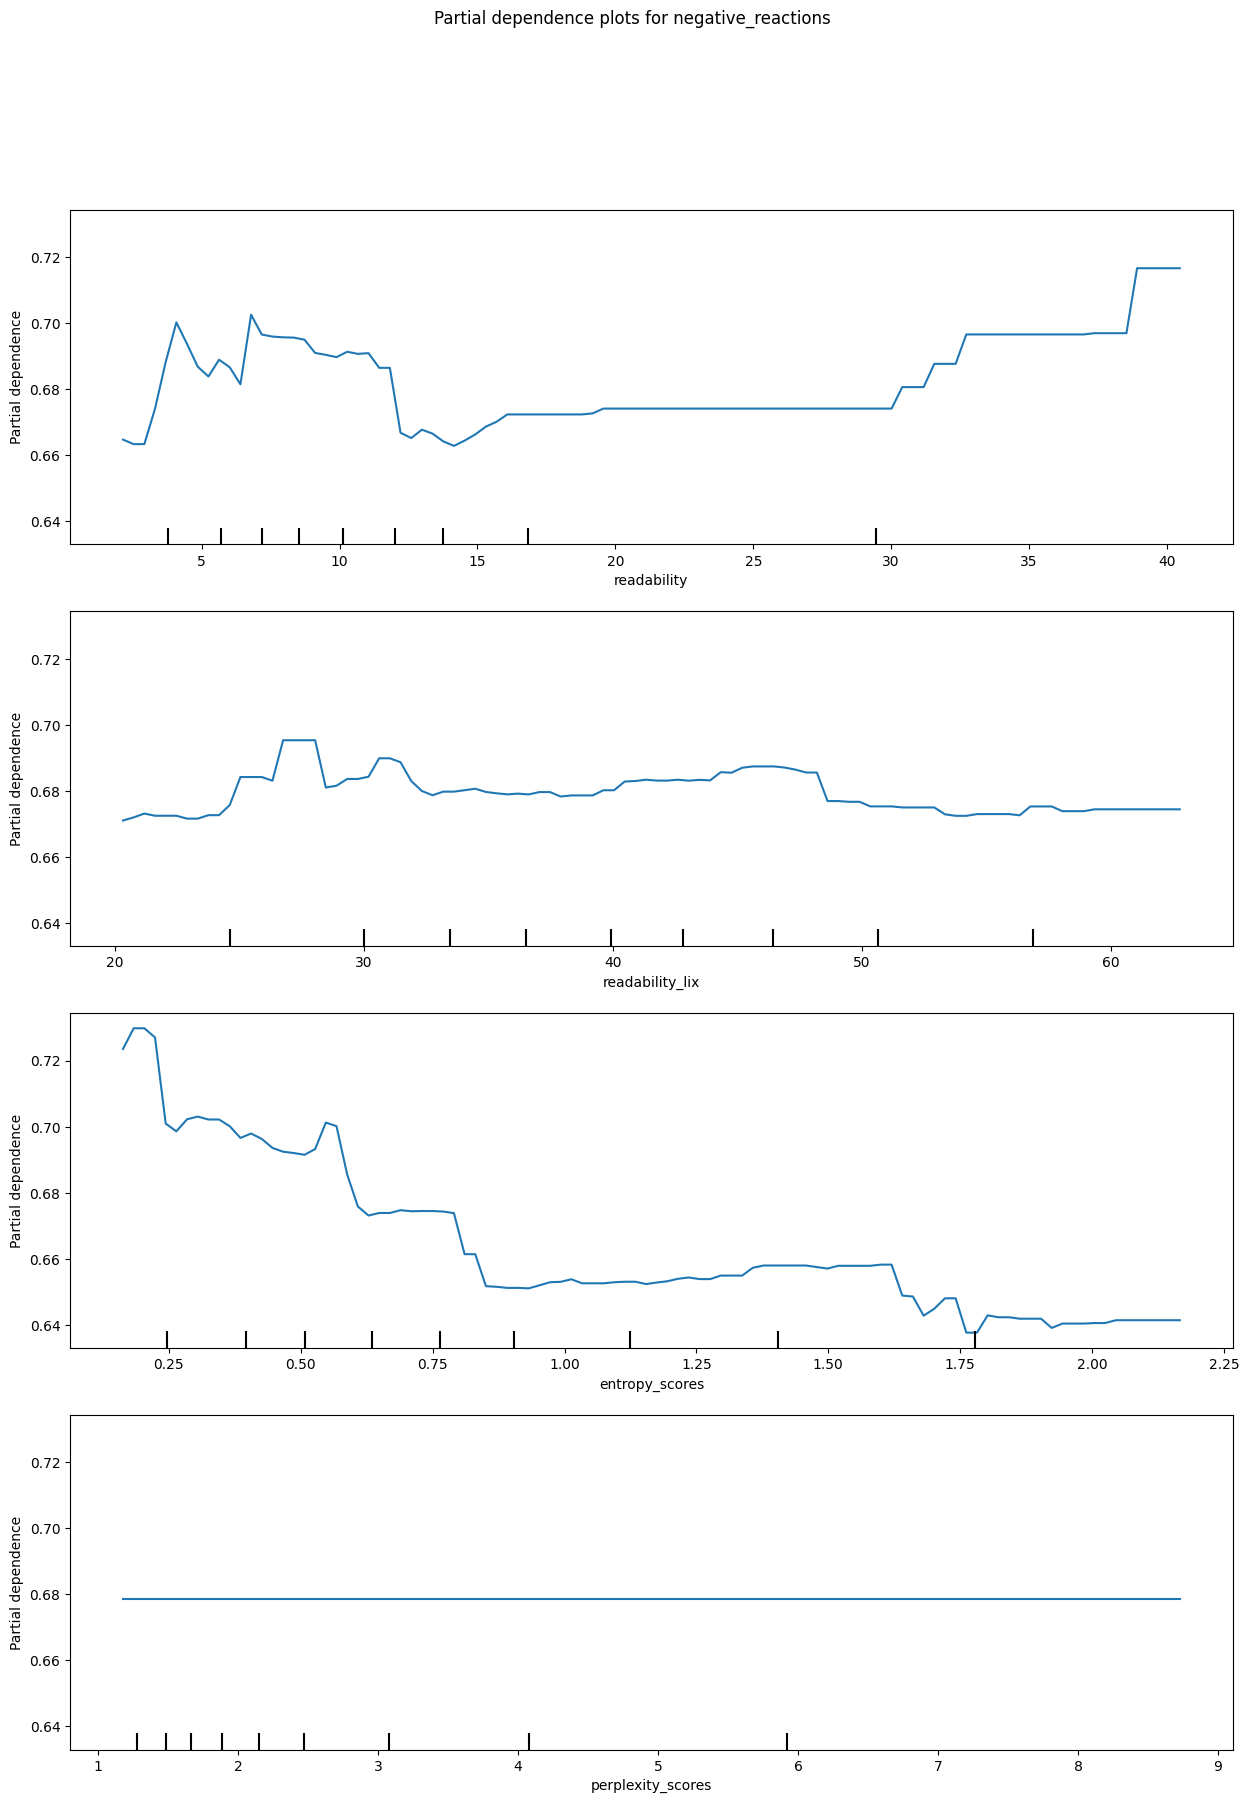

In [21]:
save_partial_dependence_plots(model, 
                            text_complexity_cols,
                            x_test, 
                            feature_name = 'text_complexity_cols', 
                            categirical_features=None)

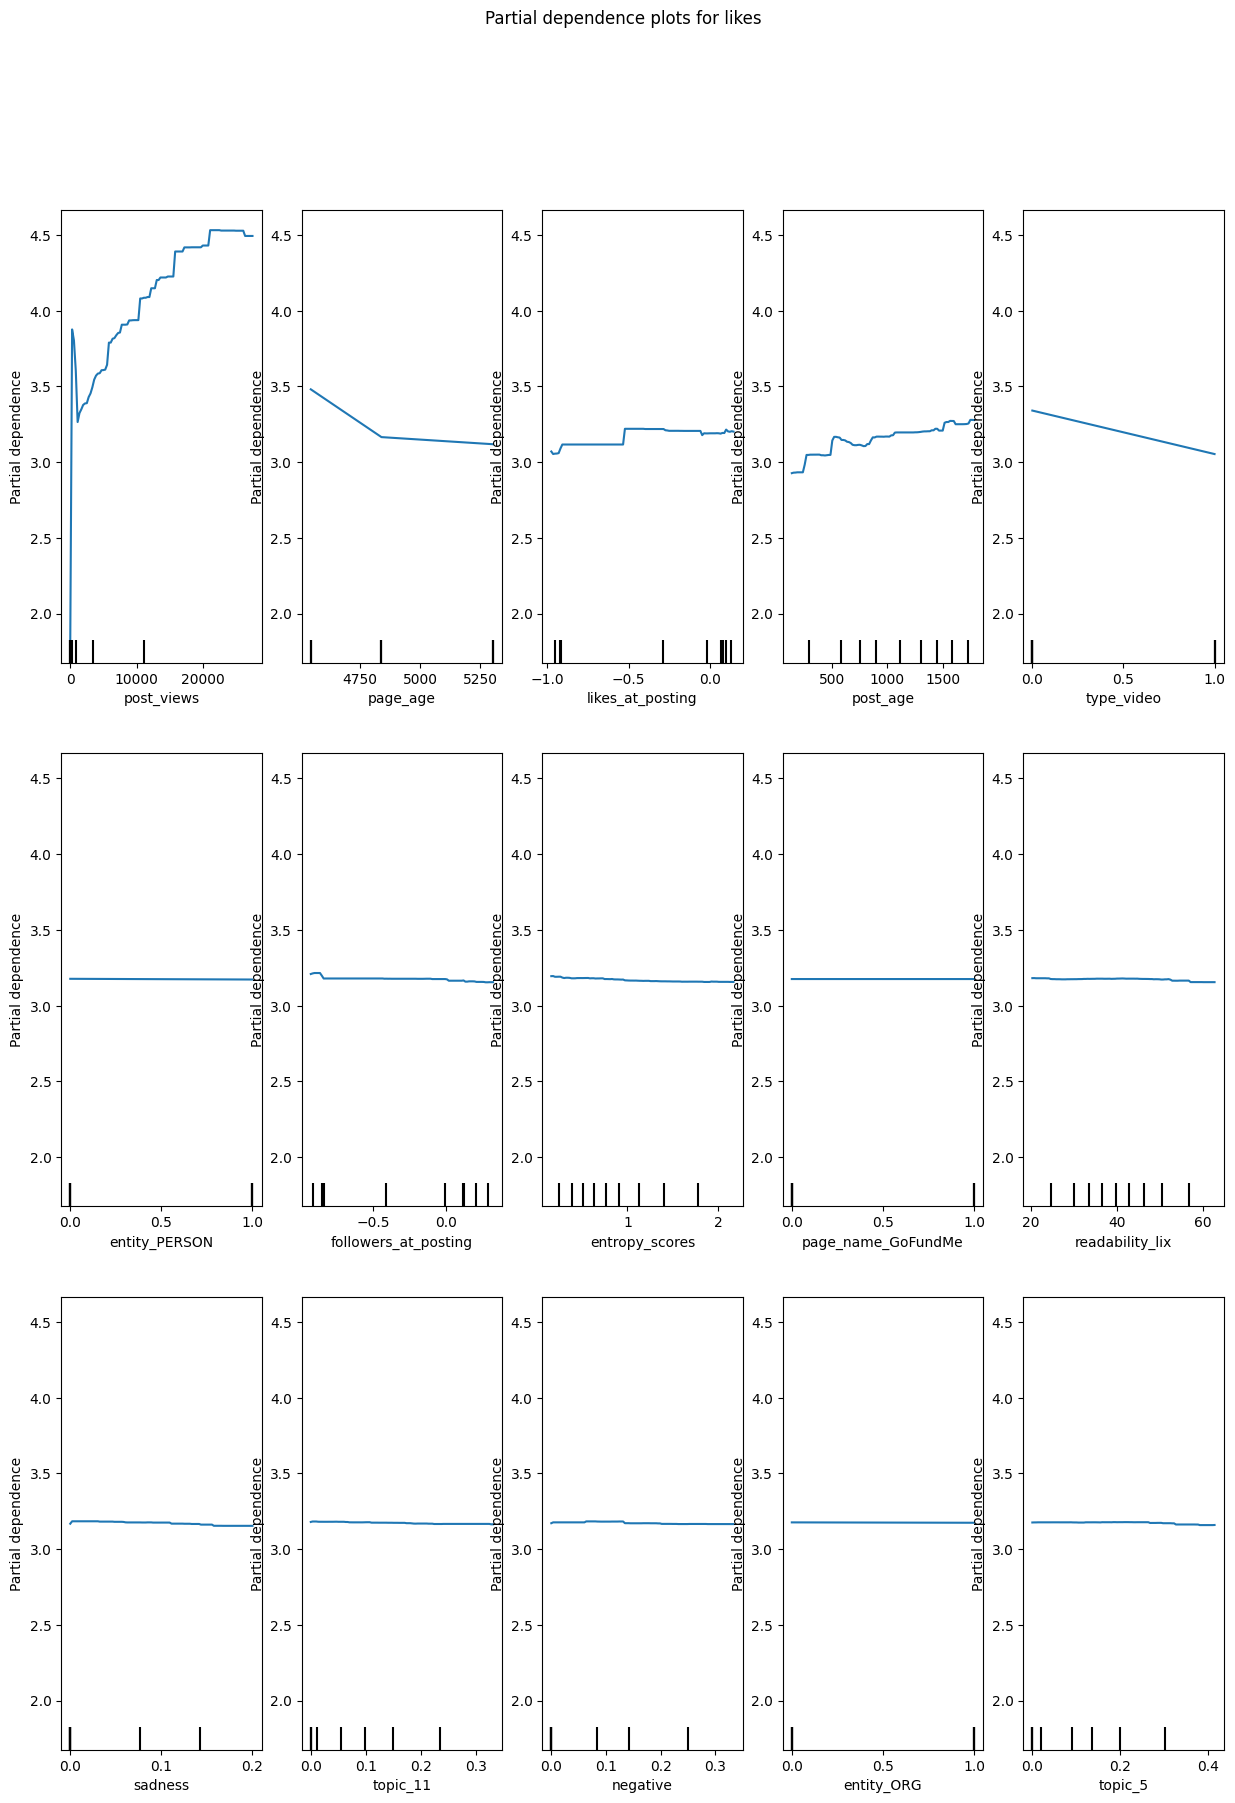

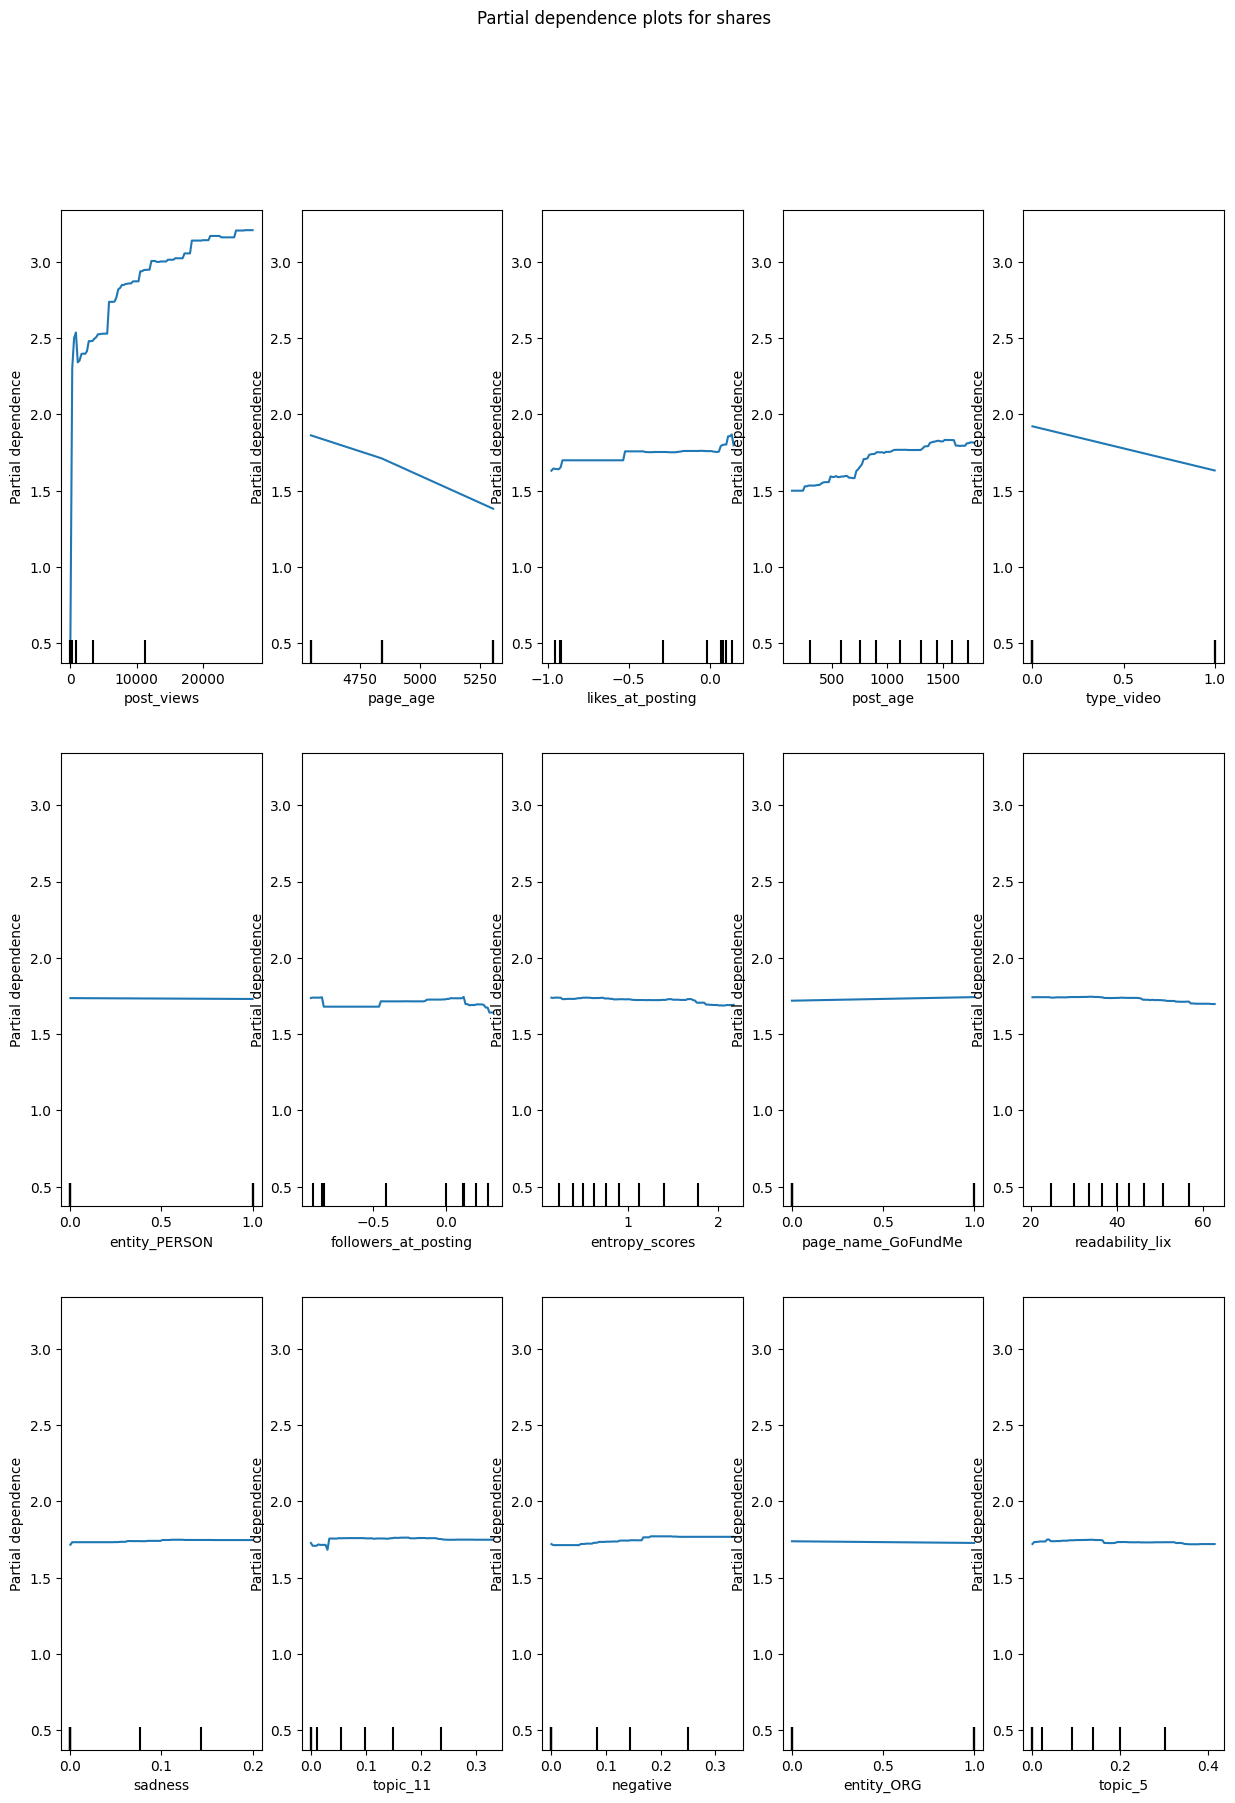

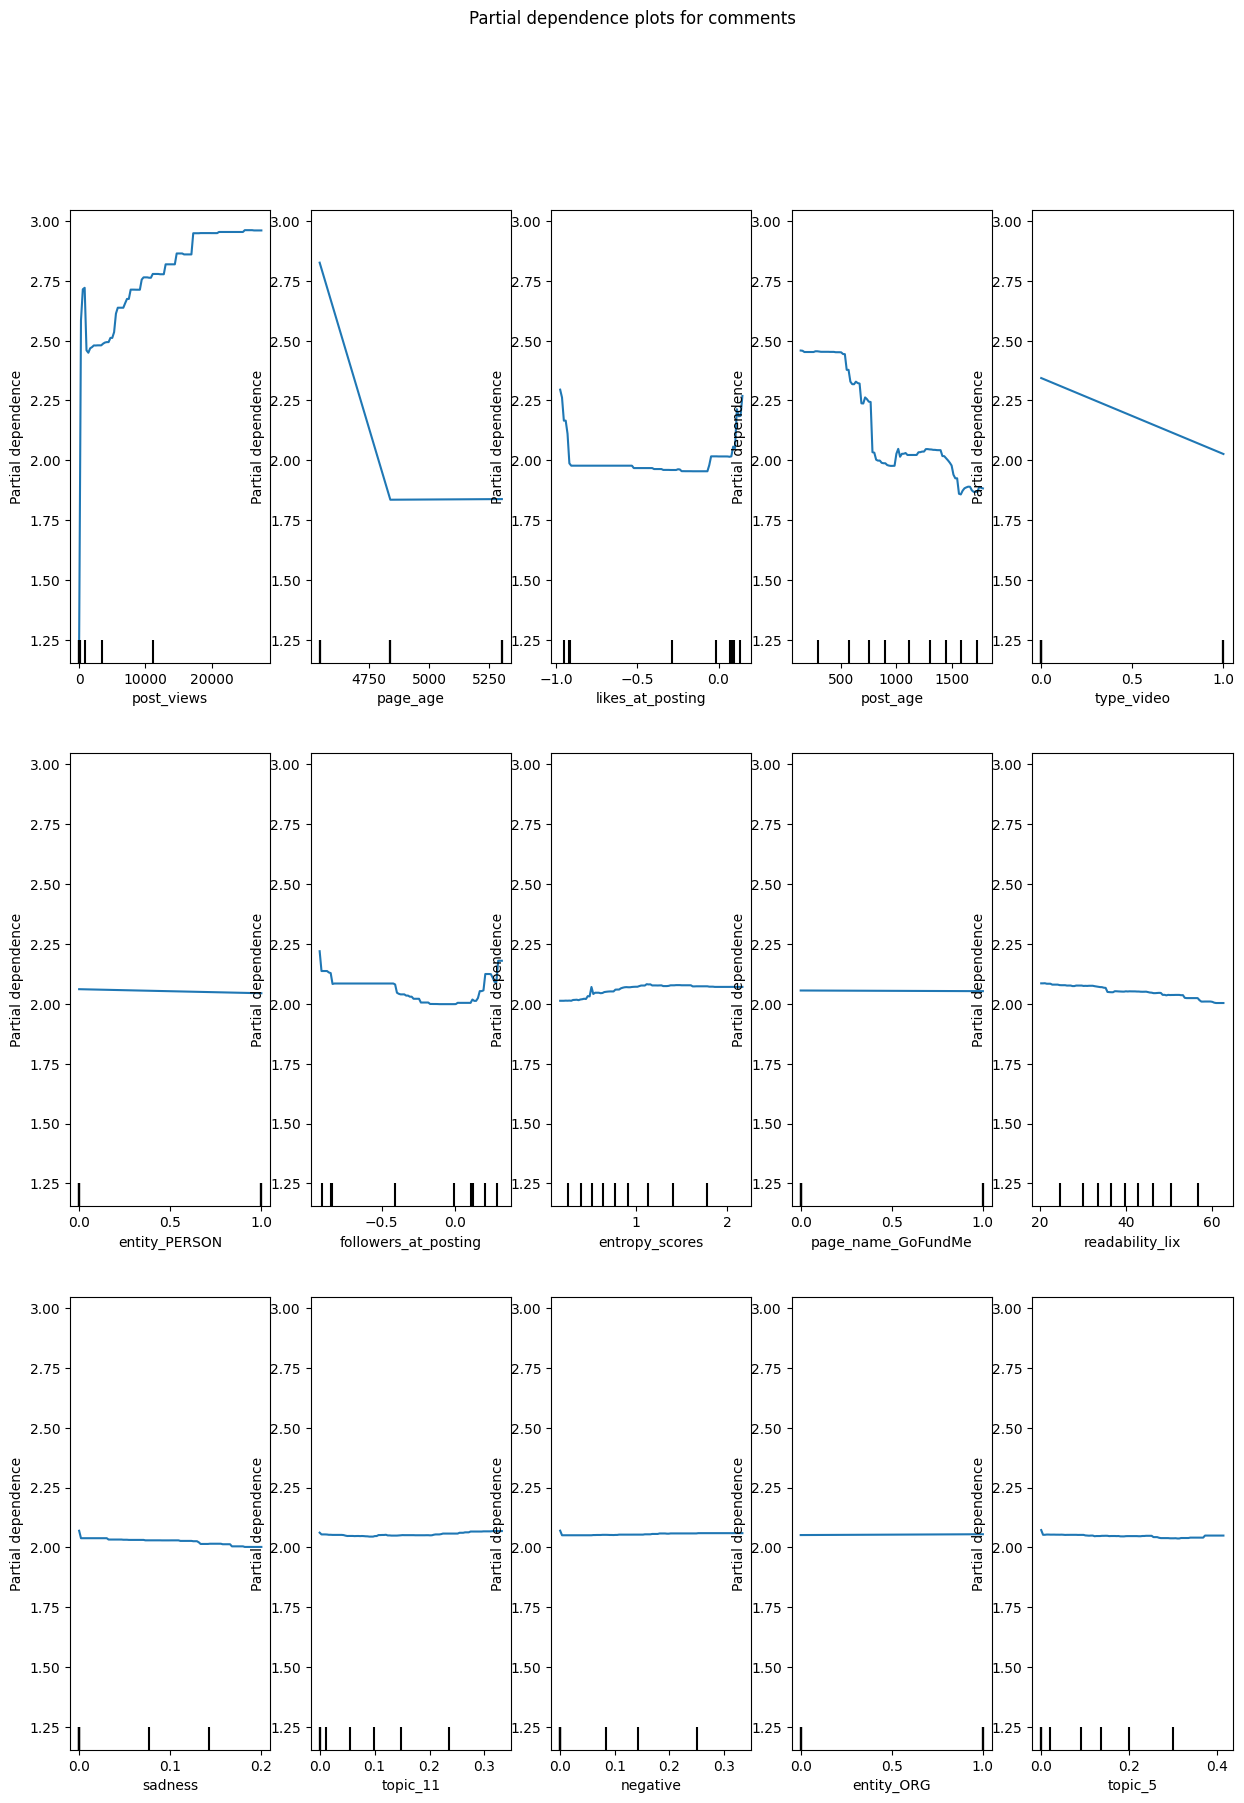

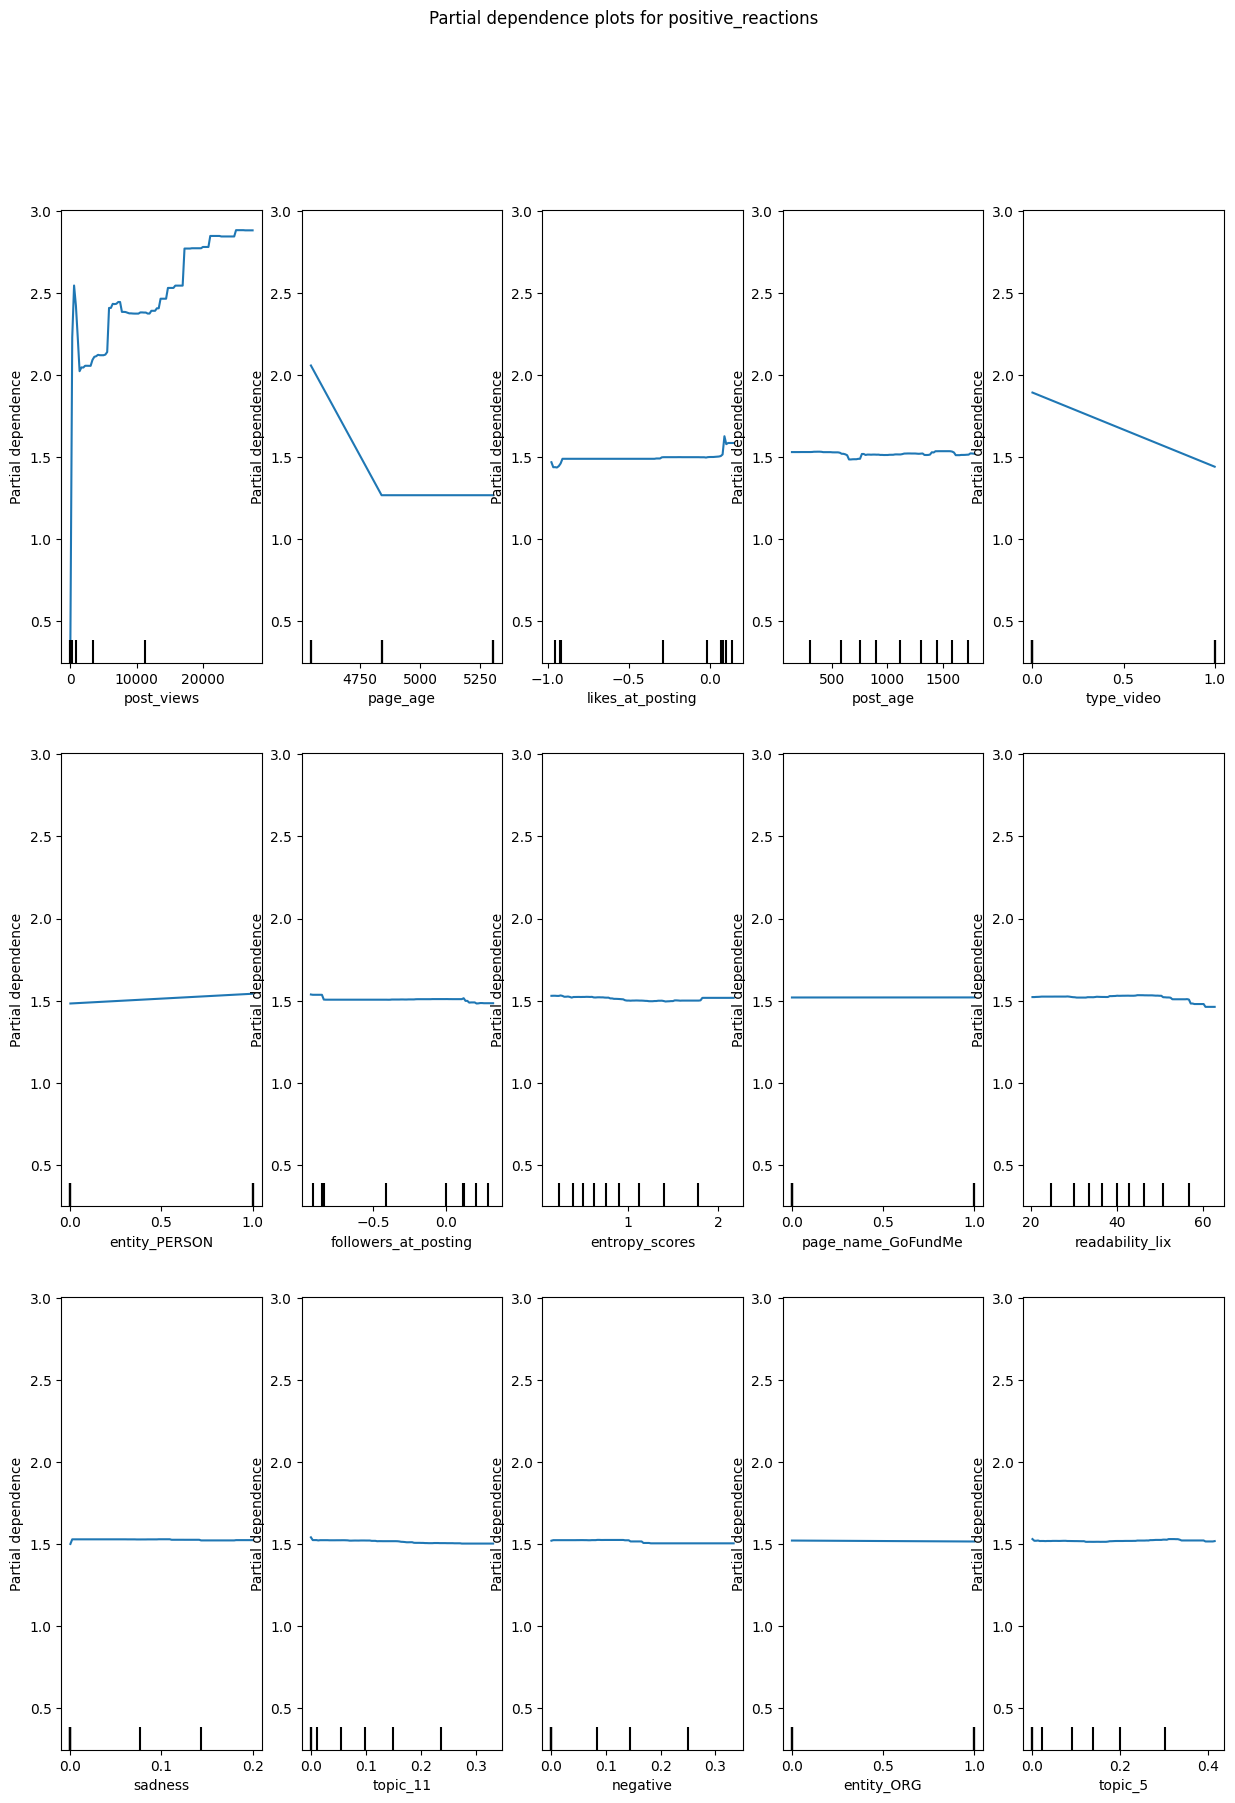

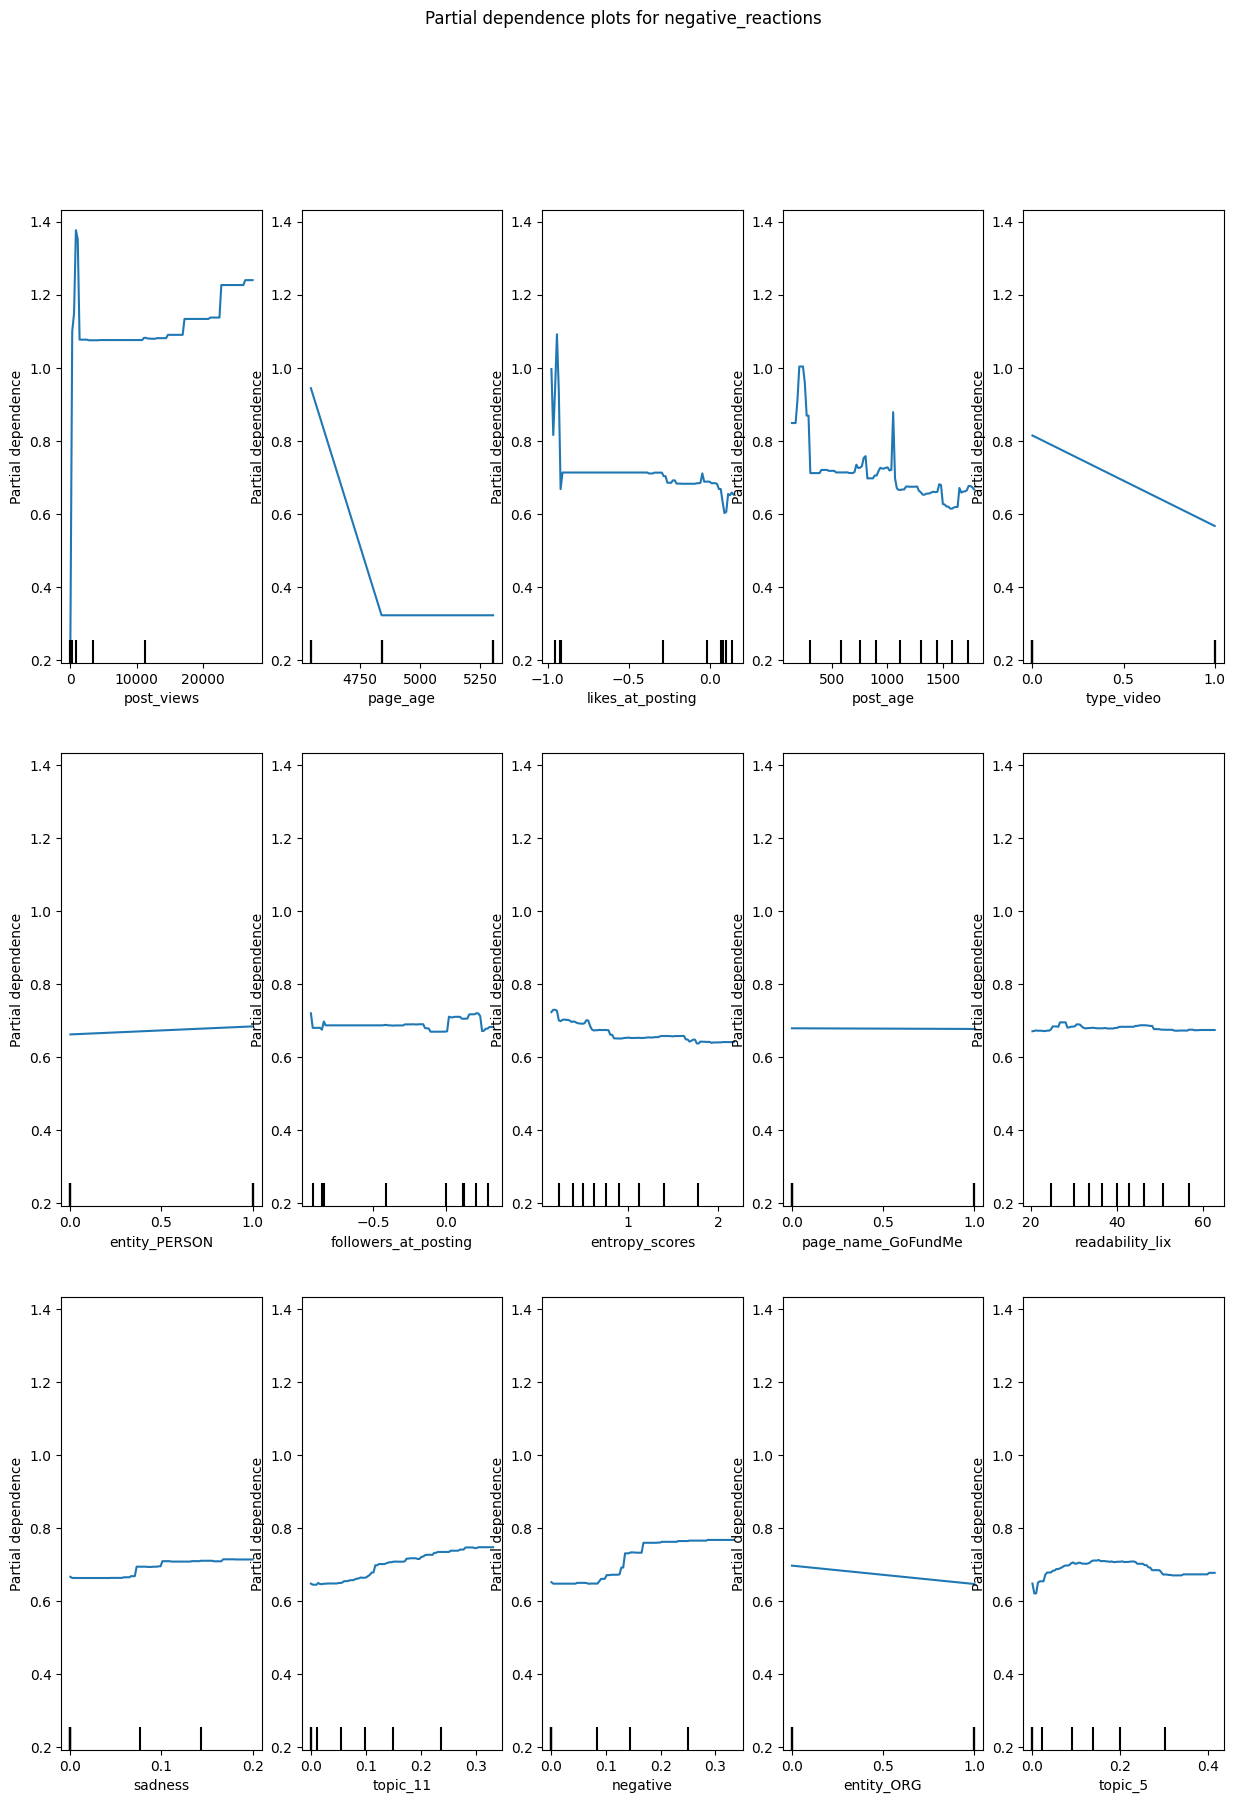

In [14]:
save_partial_dependence_plots(model, 
                            list(importance_df.index[:15]),
                            x_test, 
                            feature_name = 'top_15_features', 
                            categirical_features=None)

In [15]:
importance_df.to_csv("/home/theerthala/Documents/repos/Crowdfunding-Social-Media-Drivers/Results/01 - FB Engagement/feature_importance.csv")

In [22]:
domain

NameError: name 'domain_only' is not defined